# Data Science Project On FIFA 20 - PRCP-1004

## Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:- Explore football skills and cluster football players based on their attributes.
* Task3:- Explore the data and attempt all the below asked questions in a
  step by step manner:
    * Prepare a rank ordered list of top 10 countries with most players. Which
      countries are producing the most footballers that play at this level?
    * Plot the distribution of overall rating vs. age of players. Interpret what is the
      age after which a player stops improving?
    * Which type of offensive players tends to get paid the most: the striker, the
      right-winger, or the left-winger?

## BUISNESS CASE: WITH THE FIFA20 DATASET WE NEED TO CLUSTER THE PLAYER BY THEIR SKILL INTO CERTAIN GROUP

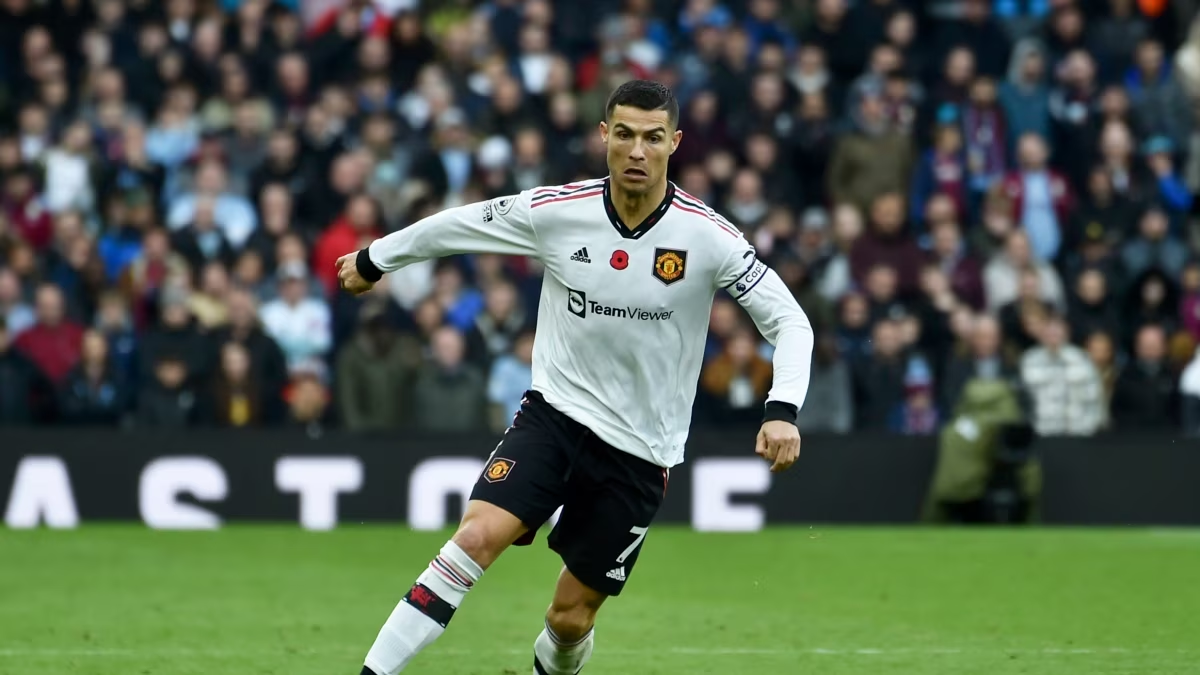

## Project Pipeline

1) Data Preprocessing

* Load the dataset and inspect the first few rows.
* Check for missing values and decide on a strategy to handle them.
* Look for any categorical variables and plan for encoding.
* Normalize or standardize numerical features if necessary.

2) Exploratory Data Analysis (EDA)

* Generate summary statistics to understand the data distribution.
* Create visualizations to uncover patterns and relationships.
* Identify any outliers or anomalies in the dataset.

3) Feature Engineering

* Create new features that might improve model performance.
* Transform features if necessary (e.g., log transformation).

4) Feature Selection

* Use statistical techniques to select a subset of relevant features.
* Employ methods like correlation analysis, Recursive Feature Elimination (RFE), or feature importance from ensemble methods.

5) Model Training and Evaluation

* Split the data into training and test sets.
* Train different models: Logistic Regression, SVM, Naive Bayes, KNN, Decision Tree, and Random Forest.
* Evaluate each model using appropriate metrics (accuracy, precision, recall, F1-score, ROC-AUC).
* Perform hyperparameter tuning if necessary.

6) Prediction

* Choose the best-performing model based on evaluation metrics.
* Make predictions on the test set.
* Interpret the results and provide insights.

## Task 1 :- Prepare a complete data analysis report on the given data.

## Important Library

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [101]:
data=pd.read_csv("players_20.csv",na_filter=['+#'])

In [102]:
data.head(5)#Top 5 

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [103]:
data.tail(5)#Bottom 5

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  ...   lwb   ldm   cdm   rdm  \
18273    China PR               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2   
18274    China PR               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2   
18275    China PR         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2   
18276    China PR  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2   
18277    China PR         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2   

        rwb    lb   lcb    cb   rcb    rb  
18273  43+2  45+2  46+2  46+2  46+2  45+2  
18274  44+2  46+2  47+2  47+2  47+2  46+2  
18275  47+2  47+2  49+2  49+2  49+2  47+2  
18276  48+2  48+2  49+2  49+2  49+2  48+2  
18277  48+2  48+2  50+2  50+2  50+2  48+2  

[5 rows x 104 columns]

## DOMAIN ANALYSIS

### INTRODUCTION OF PROJECT:

#### SOFIFA-ID:
Id of fifa20 player
#### PLAYER URL:
A URL (Uniform Resource Locator) is a unique identifier used to locate a resource on the Internet. It is also referred to as a web address.
#### SHORT NAME:
Short or nick name name of player
#### LONG NAME:
Full name of player
#### AGE:
Age in years
#### DOB:
Date of birth of player
#### HEIGHT CM:
Player height in centimeter
#### WEIGHT KG:
Player body weight
#### NATIONALITY:
Nationality is the legal status, which represents the country from which an individual belongs. 
#### CLUB:
A group of people formed for the purpose of playing sports.
#### OVERALL:
The OVR (Overall) is made up of all the player's ingame stats.
#### POTENTIAL:
The potential rating, is the rating they will achieve for sure during the FIFA 20 career mode.
#### VALUE EUR:
The value of palyer in euro.
#### WAGE EUR:
A living wage is the amount of income needed to provide an player with a basic but socially acceptable standard of living.
#### PLAYER POSITIONS:
Positions indicate approximately where each player should be lined up prior to the start of a play.
#### PREFEERED FOOT:
Footedness may refer to the foot a player uses to kick with the greatest force and skill.
#### INTERNATIONAL REPUTATION:
International reputation is rated with 1-5 stars.
#### WEAK FOOT:
A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's.
#### SKILL MOVES:
skill moves, it is assigned a number between 1 (least complex) and 5 (most complex). Players with higher skills are able to perform more complex moves.
#### WORK RATE:
work rates are how hard the player works on each end of the field.
#### BODY-TYPE:
A custom body type and character of football payer.
#### REAL FACE:
Face scan of real football palyer if it 'yes' then the character is look super realistic.
#### RELEASE CLAUSE EUR:
A release clause is the minimum amount of money you're willing to accept for that player.
#### PLAYER TAGS:
The tages of player is identified the palyer skills,like [Dribbler, Distance shooter, Crosser, Speedster]
#### TEAM POSITION:
The player’s positioning on the field
#### TEAM JERSEY NUMBER:
The number on the back of a football player's jersey is to identify a specific player.
#### LONED FROM:
It's a temporary restriction placed on player due to their club being short of players.
#### JOINED:
Joining date of club
#### CONTRACT VALID UNTIL:
The end year of contract of players.
#### NATION POSITION:
Nation position is similar to the team position of players.
#### NATION JERSEY NUMBER:
Jersey number of player.
#### PACE:
Fastest pace of player,striker or winger
#### SHOOTING:
shooting is hitting the ball in an attempt to score a goal. It is usually done using the feet or head.
#### PASSING:
The purpose of passing is to keep possession of the ball by maneuvering it on the ground between different players with the objective of advancing it up the playing field.
#### DRIBLING:
Dribbling Is Maneuvering A Ball By One Player While Moving In A Given Direction, Avoiding Problems’ Attempts To Intercept The Ball.
#### DEFENDING:
Defending is most relate to the defender to stop the attack
#### PHYSIC:
physic in player means intensity and their effort.
#### GK DIVING:
Goal keeper diving to save a shot.
#### GK HANDLING:
As a goalkeeper, you are allowed to handle the ball with your hands within your penalty area.
#### GK KICKING:
The goalkeeper is the player who usually kicks the ball to resume play, and they either kick it short to a teammate or it is kicked extremely hard to travel a long distance.
#### GK REFLEX:
Ability to react quickly.
#### GK SPEED:
Spped of goal keeper.
#### GK POSITIONING:
Position of goal keeper is around only goal posts.
#### PLAYER TRAITS:
A player’s traits are actions that he will be more likely to perform in matches.
#### ATTACKING CROSSING:
The aim of a cross is to create the easiest possible scenario for the attacking player to score a goal.
#### ATTACKING FINISHING:
Create a attack on field to score a goal
#### ATTACKING HEADING ACCURACY:
One of the fundamental principles of the attacking header is to head the ball downwards.
#### ATTACKING SHORT PASSING:
Short passes of ball to score a goal
#### ATTACKING VOLLEYS:
A volley is an air-borne strike in association football, where a player's foot meets and directs the ball in an angled direction before it has time to reach the ground.
#### SKILL DRIBBLING:
The score of dribbling skill with football
#### SKILL CURVE:
The curve of football at the time of goal
#### SKILL FK ACCURACY:
It stands for field goal. It is when a player kicks a ball through the uprights from a set distance.
#### SKILL LONG PASSING:
The long passing skill score of the player
#### SKILL BALL CONTROL:
The ball control of the player at playing time
#### MOVEMENT ACCERLATION:
how quickly player can increase your velocity towards maximum speed.
#### MOVEMENT SPRINT SPPED:
Sprinting speed score of the player.
#### MOVEMENT AGILITY:
Agility is the ability to move quickly and easily, including moving in different directions without losing balance
#### MOVEMENT REACTION:
The score of the quick reation of player.
#### MOVEMENT BALANCE:
Balance is the ability to control your body in its own space.
#### SHOT POWER:
power generate to score a goal.
#### POWER JUMPING:
The jumping ability of the player on field.
#### POWER STAMINA:
Stamina of player on filed.
#### POWER STRENGTH:
Strength of player on field.
#### POWER LONG SHOT:
Total no of power long shot of football.
#### MENTAILITY AGGRESSION:
aggression is a characteristic that can have many negative as well as positive effects on performance of player.
#### MENTALITY INTERCEPTION:
interception is thrown the possession of the ball is given to the other team.
#### MENTALITY POSITIONING:
The mentality positioning of player determines how defensive or attacking your players set out to play.
#### MENTALITY VISION:
The vision/mindset of player on filed.
#### MENTALITIES PENALTIES:
when a player commits an infraction against the rules of the game a foul will be called and a penalty will be assessed.
#### MENTALITY COMPOSURE:
composure stand for: Recognize–Regroup–Refocus. The first step is to Recognize that you are dwelling on the mistake, which limits your ability focus on the next play.
#### DEFENDING MAKING:
when your team is defending, you want to make the field small and the options of the other team limited.
#### DEFENDING STANDING TACKLE:
Defending standing Tackle of the player to get a ball on filed.
#### DEFENDING SLIDING TACKLE:
Defending sliding tackle of player to get a ball.
#### GOALKEEPING DIVING:
Goal keeper diving to save a goal.
#### GOALKEEPING HANDLING:
handle the ball with your hands within your penalty area.
#### GOALKEEPING KICKING:
A kick taken by the goalkeeper when the attacking team has kicked the ball over the goal line.
#### GOALKEEPING POSITIONING:
A Positioning of player to save the goal.
#### GOALKEEPING REFLEX:
The reflex of goalkeeper and players.
### THE REMAINING FEATURE IS THE ABBREVATION OF FOOTBALL POSITION SCORE:
#### LS:
Long snapper or left striker.
#### ST:
Striker
#### RS:
Right striker
#### LW:
Left sided wingers.
#### LF:
Left forword
#### CF:
Center forword
#### RF:
Right forword
#### RW:
The RW is usually on the right end of the attacking trident, with the Striker and Left Winger, which mainly contributes to the team in terms of goals and assists.
#### LAM:
Left attacking midfield
#### CAM:
Center attacking midfield
#### RAM:
Right attacking midfield
#### LM:
Left midfield
#### LCM:
Left center midfield
#### CM:
Center Midfield
#### RCM:
Right center midfield
#### RM:
Right midfield
#### LWB:
Left Wing Back
#### LDM:
Left defensive midfield
#### CDM:
Center defensive midfield
#### RDM:
Right defensive midfield
#### RWB:
Right wing back
#### LB:
Left back
#### LCB:
Left center back
#### CB:
Center back
#### RCB:
Right center back
#### RB:
Right back




##### FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch.

## Basic Checks

In [104]:
data.shape# shape og data

(18278, 104)

* In all data 18278 data points and 104 feature.

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [106]:
data.describe()#Statistical Summary

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

In [107]:
data.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type  ...    lwb    ldm    cdm  \
count           18278          18278     18278  ...  16242  16242  16242   
unique              2              9        10  ...     98     98     98   
top             Right  Medium/Medium    Normal  ...   59+2   59+2   59+2   
freq            13960           9875     10750  ...    682    636    636   

          rdm    rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  16242  
unique     98     98     96    110    110    110     96  
top      59+2   59+2   61+2   63+2   63+2   63+2   61+2  
freq      636    682    667    621    621    621    667  

[4 rows x 43 columns]

In [108]:
print(data.columns.tolist())#All columns

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

* 104 different types of columns are provided to us in dataset

In [109]:
data.isnull().sum().sort_values(ascending=False)#Mising value

loaned_from                   17230
nation_position               17152
nation_jersey_number          17152
player_tags                   16779
gk_speed                      16242
gk_diving                     16242
gk_handling                   16242
gk_reflexes                   16242
gk_kicking                    16242
gk_positioning                16242
player_traits                 10712
lf                             2036
lw                             2036
rs                             2036
physic                         2036
defending                      2036
dribbling                      2036
passing                        2036
shooting                       2036
st                             2036
ls                             2036
rb                             2036
pace                           2036
rdm                            2036
rwb                            2036
ldm                            2036
lwb                            2036
rm                          

In [110]:
data.dtypes #dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

In [111]:
data.duplicated().sum()#no duplicates

0

In [112]:
print(data["short_name"].unique().tolist())

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'J. Oblak', 'E. Hazard', 'K. De Bruyne', 'M. ter Stegen', 'V. van Dijk', 'L. Modrić', 'M. Salah', 'K. Mbappé', 'K. Koulibaly', 'H. Kane', 'Alisson', 'De Gea', 'N. Kanté', 'G. Chiellini', 'S. Agüero', 'Sergio Ramos', 'L. Suárez', 'R. Lewandowski', 'Sergio Busquets', 'A. Griezmann', 'P. Dybala', 'P. Pogba', 'Ederson', 'R. Sterling', 'C. Eriksen', 'T. Courtois', 'Piqué', 'S. Handanovič', 'M. Neuer', 'H. Lloris', 'David Silva', 'E. Cavani', 'D. Godín', 'T. Kroos', 'M. Reus', 'P. Aubameyang', 'S. Mané', 'A. Laporte', 'Bernardo Silva', 'Casemiro', 'H. Son', 'Fernandinho', 'Thiago Silva', 'K. Benzema', 'J. Vertonghen', 'D. Mertens', 'M. Hummels', 'T. Alderweireld', 'Jordi Alba', 'Thiago', 'K. Navas', 'L. Insigne', 'L. Sané', 'Marquinhos', 'M. Škriniar', 'M. Verratti', 'S. Umtiti', 'W. Szczęsny', 'J. Kimmich', 'Isco', 'Roberto Firmino', 'I. Rakitić', 'M. Pjanić', 'A. Di María', 'L. Bonucci', 'Coutinho', 'Parejo', 'T. Müller', 'C. Immobile', 'A. La

In [113]:
pd.set_option("display.max_rows", None); print(data["short_name"].value_counts())#get all value counts with their name

short_name
J. Rodríguez              11
Paulinho                   9
J. García                  8
J. Williams                7
J. Hernández               7
J. Gómez                   6
J. Clarke                  6
J. Jones                   6
R. González                6
M. Pedersen                5
L. López                   5
J. Brown                   5
Bruno                      5
M. López                   5
M. Smith                   5
J. López                   5
R. Williams                5
J. Sánchez                 5
J. Pérez                   5
J. González                5
J. Valencia                5
M. Gómez                   5
J. Martínez                5
Y. Suzuki                  4
M. Rodríguez               4
M. Andersen                4
F. Rodríguez               4
M. Camara                  4
D. González                4
M. Sylla                   4
G. Rodríguez               4
L. Martínez                4
M. Sarr                    4
T. Müller                  4
L. 

In [114]:
#how to get specific name with their value counts()
data["short_name"].loc[data["short_name"] == "L. Messi"].count()

1

## Insight

* FROM describe() function:gives Statistics Summary- -Statistics summary gives a high-level idea to identify whether the data     has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewness.
* we have 104 feature and feature have some missing value, correlated feature, outlier etc.... 

## DATA PREPROCESSING

### How to handle missing value

* This dataset has lots of features so we need to drop some of the features that are not relevant to our goal/business case.

* We can split the dataset in numerical and categorical columns to make the data analysis faster.

* This dataset also has lots of missing values. As such we need to take care of the missing values first, so that we may get an   accurate reading of our dataset

In [115]:
# First remove the special character from data
data=data.replace("[\#]"," ",regex=True)
data.head(2)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   

   height_cm  weight_kg nationality          club  ...   lwb   ldm   cdm  \
0        170         72   Argentina  FC Barcelona  ...  68+2  66+2  66+2   
1        187         83    Portugal      Juventus  ...  65+3  61+3  61+3   

    rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  65+3  61+3  53+3  53+3  53+3  61+3  

[2 rows x 104 columns]

In [116]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm','cm', 'rcm', 'rm', 'lwb', 'ldm',
           'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]
for colum in columns:
    data[colum]=data[colum].str.split("+",expand=True)[0]
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  ...  lwb  ldm  cdm  rdm rwb  lb  lcb  cb  rcb  rb  
0   Argentina  FC Barcelona  ...   68   66   66   66  68  63   52  52   52  63  

[1 rows x 104 columns]

### 1 CHECK MISSING VALUE

In [117]:
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

* Here we see that there are number of columns that have missing values but can be imputed from other columns values.

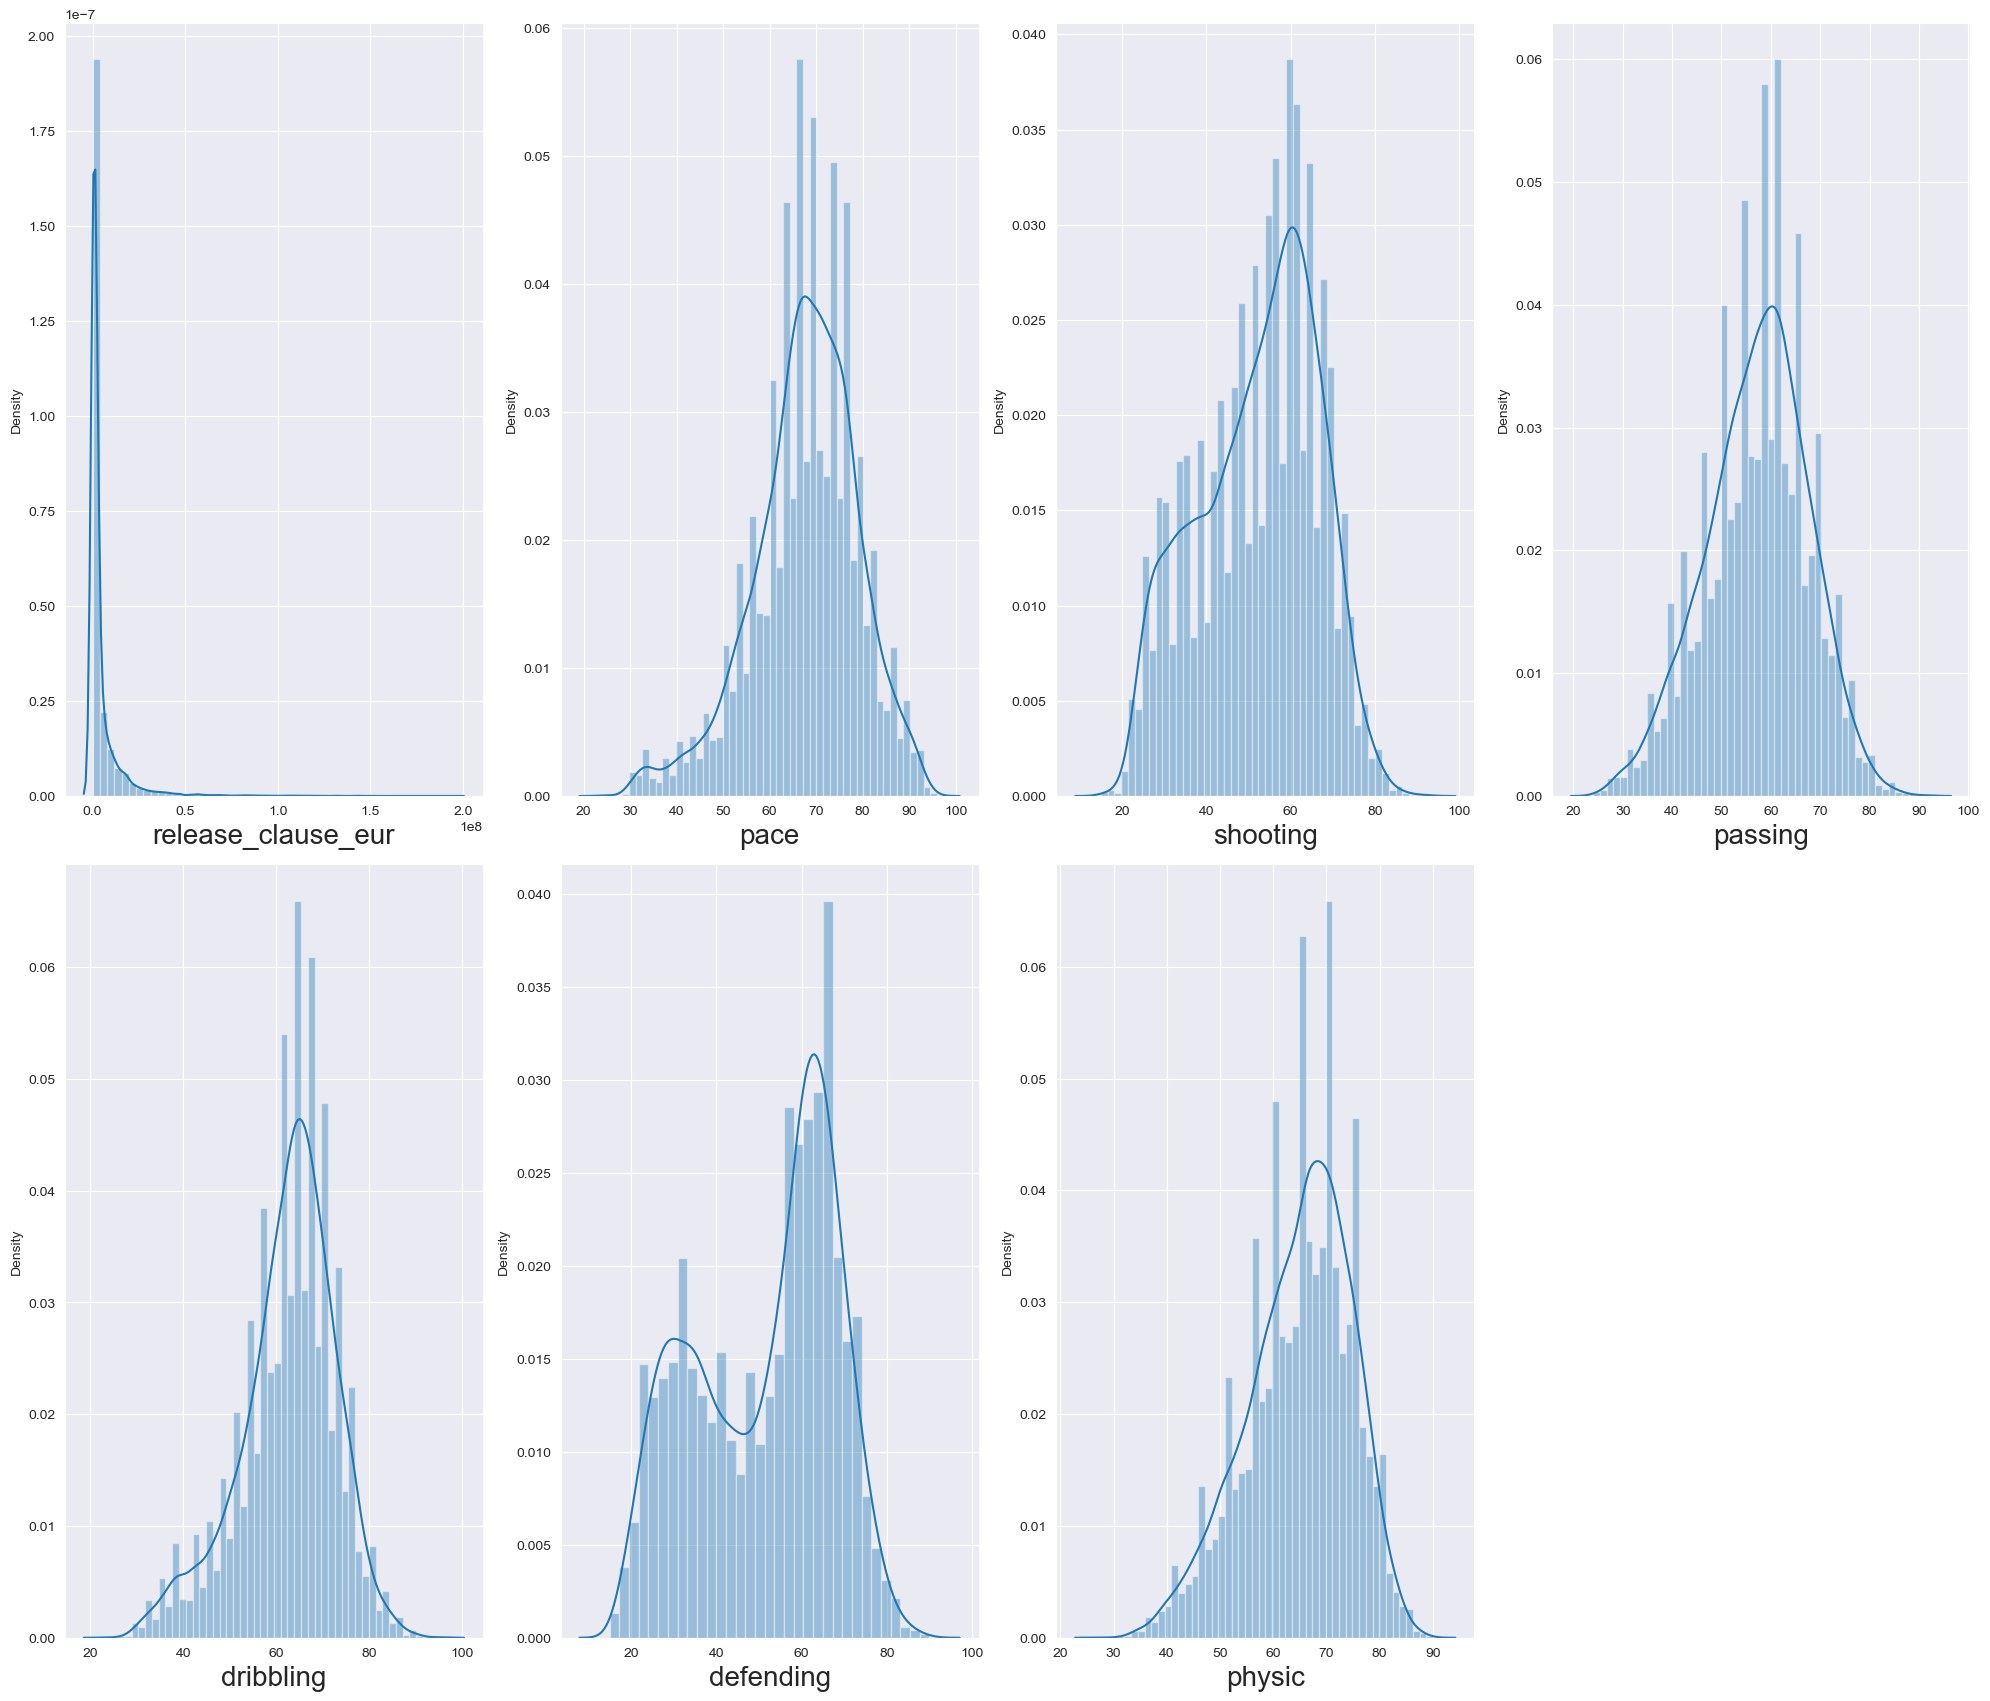

In [118]:
#Distrubution of data
Num_mising=data[["release_clause_eur","pace","shooting","passing","dribbling","defending","physic"]]
plt.figure(figsize=(20,25))
plotnumber=1
for abhi in Num_mising:
    if plotnumber<=10:
        plt.subplot(3,4,plotnumber)
        sns.distplot(x=Num_mising[abhi])
        plt.xlabel(abhi,fontsize=20)
        plotnumber+=1
        plt.tight_layout()
plt.show()

### Missing Value - Calculate percentage of missing value

In [119]:
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=["Missing_Value","Missing_Percentage"])
    return null_value
missing_value(data)

Missing_Value  Missing_Percentage
sofifa_id                               0            0.000000
player_url                              0            0.000000
short_name                              0            0.000000
long_name                               0            0.000000
age                                     0            0.000000
dob                                     0            0.000000
height_cm                               0            0.000000
weight_kg                               0            0.000000
nationality                             0            0.000000
club                                    0            0.000000
overall                                 0            0.000000
potential                               0            0.000000
value_eur                               0            0.000000
wage_eur                                0            0.000000
player_positions                        0            0.000000
preferred_foot                          0            0.000000
international_reputation                0            0.000000
weak_foot                               0            0.000000
skill_moves                             0            0.000000
work_rate                               0            0.000000
body_type                               0            0.000000
real_face                               0            0.000000
release_clause_eur                   1298            7.101433
player_tags                         16779           91.798884
team_position                         240            1.313054
team_jersey_number                    240            1.313054
loaned_from                         17230           94.266331
joined                               1288            7.046723
contract_valid_until                  240            1.313054
nation_position                     17152           93.839589
nation_jersey_number                17152           93.839589
pace                                 2036           11.139074
shooting                             2036           11.139074
passing                              2036           11.139074
dribbling                            2036           11.139074
defending                            2036           11.139074
physic                               2036           11.139074
gk_diving                           16242           88.860926
gk_handling                         16242           88.860926
gk_kicking                          16242           88.860926
gk_reflexes                         16242           88.860926
gk_speed                            16242           88.860926
gk_positioning                      16242           88.860926
player_traits                       10712           58.605974
attacking_crossing                      0            0.000000
attacking_finishing                     0            0.000000
attacking_heading_accuracy              0            0.000000
attacking_short_passing                 0            0.000000
attacking_volleys                       0            0.000000
skill_dribbling                         0            0.000000
skill_curve                             0            0.000000
skill_fk_accuracy                       0            0.000000
skill_long_passing                      0            0.000000
skill_ball_control                      0            0.000000
movement_acceleration                   0            0.000000
movement_sprint_speed                   0            0.000000
movement_agility                        0            0.000000
movement_reactions                      0            0.000000
movement_balance                        0            0.000000
power_shot_power                        0            0.000000
power_jumping                           0            0.000000
power_stamina                           0            0.000000
power_strength                          0            0.000000
power_long_shots                        0            0.00000

1) player_tags,loaned_from,nation_position,nation_jersey_number,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed
   all feature have highest missing value

### CATEGORICAL

In [120]:
# We will impute the missing values of nation_jersey_number with team_jersey_number.
#we will impite the missing value of team position with nation position

data['team_position'].fillna(data['nation_position'], inplace=True)
data["nation_jersey_number"] = data["nation_jersey_number"].fillna(data["team_jersey_number"])

In [121]:
#Right = 1
#Left = 0
data.preferred_foot = data.preferred_foot.map({'Right':1,'Left':0})

In [122]:
# Impute missing value using median because distribution is not normal
data.loc[data['release_clause_eur'].isnull()==True,'release_clause_eur']=data['release_clause_eur'].median()

# Imputing missing values of features for goalkeepers from other similiar features
data["pace"] = data["pace"].fillna(data["gk_speed"])
data["shooting"] = data["shooting"].fillna(data["gk_kicking"])
data["physic"] = data["physic"].fillna(data["gk_handling"])
data["defending"] = data["defending"].fillna(data["gk_reflexes"])
data["passing"] = data["passing"].fillna(data["gk_positioning"])
data["dribbling"] = data["dribbling"].fillna(data["gk_diving"])

In [123]:
Absent = ["ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb"]

for i in Absent:
    data[i] = data[i].fillna(0)

In [124]:
print("release_clause_eur :",data["release_clause_eur"].isnull().sum())
print("pace :",data["pace"].isnull().sum())
print("shooting :",data["shooting"].isnull().sum())
print("passing :",data["passing"].isnull().sum())
print("dribbling :",data["dribbling"].isnull().sum())
print("defending :",data["defending"].isnull().sum())
print("physic :",data["physic"].isnull().sum())
print("team_position :",data["team_position"].isnull().sum())
print("nation_jersey_number :",data["nation_jersey_number"].isnull().sum())

release_clause_eur : 0
pace : 0
shooting : 0
passing : 0
dribbling : 0
defending : 0
physic : 0
team_position : 0
nation_jersey_number : 0


In [125]:
# We will drop unneccesary columns
data.drop(['sofifa_id','contract_valid_until','team_jersey_number','gk_diving',
             'gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1,inplace=True)

## Task 2:- Explore football skills and cluster football players based on their attributes.

##  EXPLORATORY DATA ANALYSIS 

-Using EDA :Visualize fesatures, insight /observation from the data

* Missing Values
* All The Numerical Variables
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers

## Univariate Analysis - Numerical Data

### Visualizing the distribution of common features of players

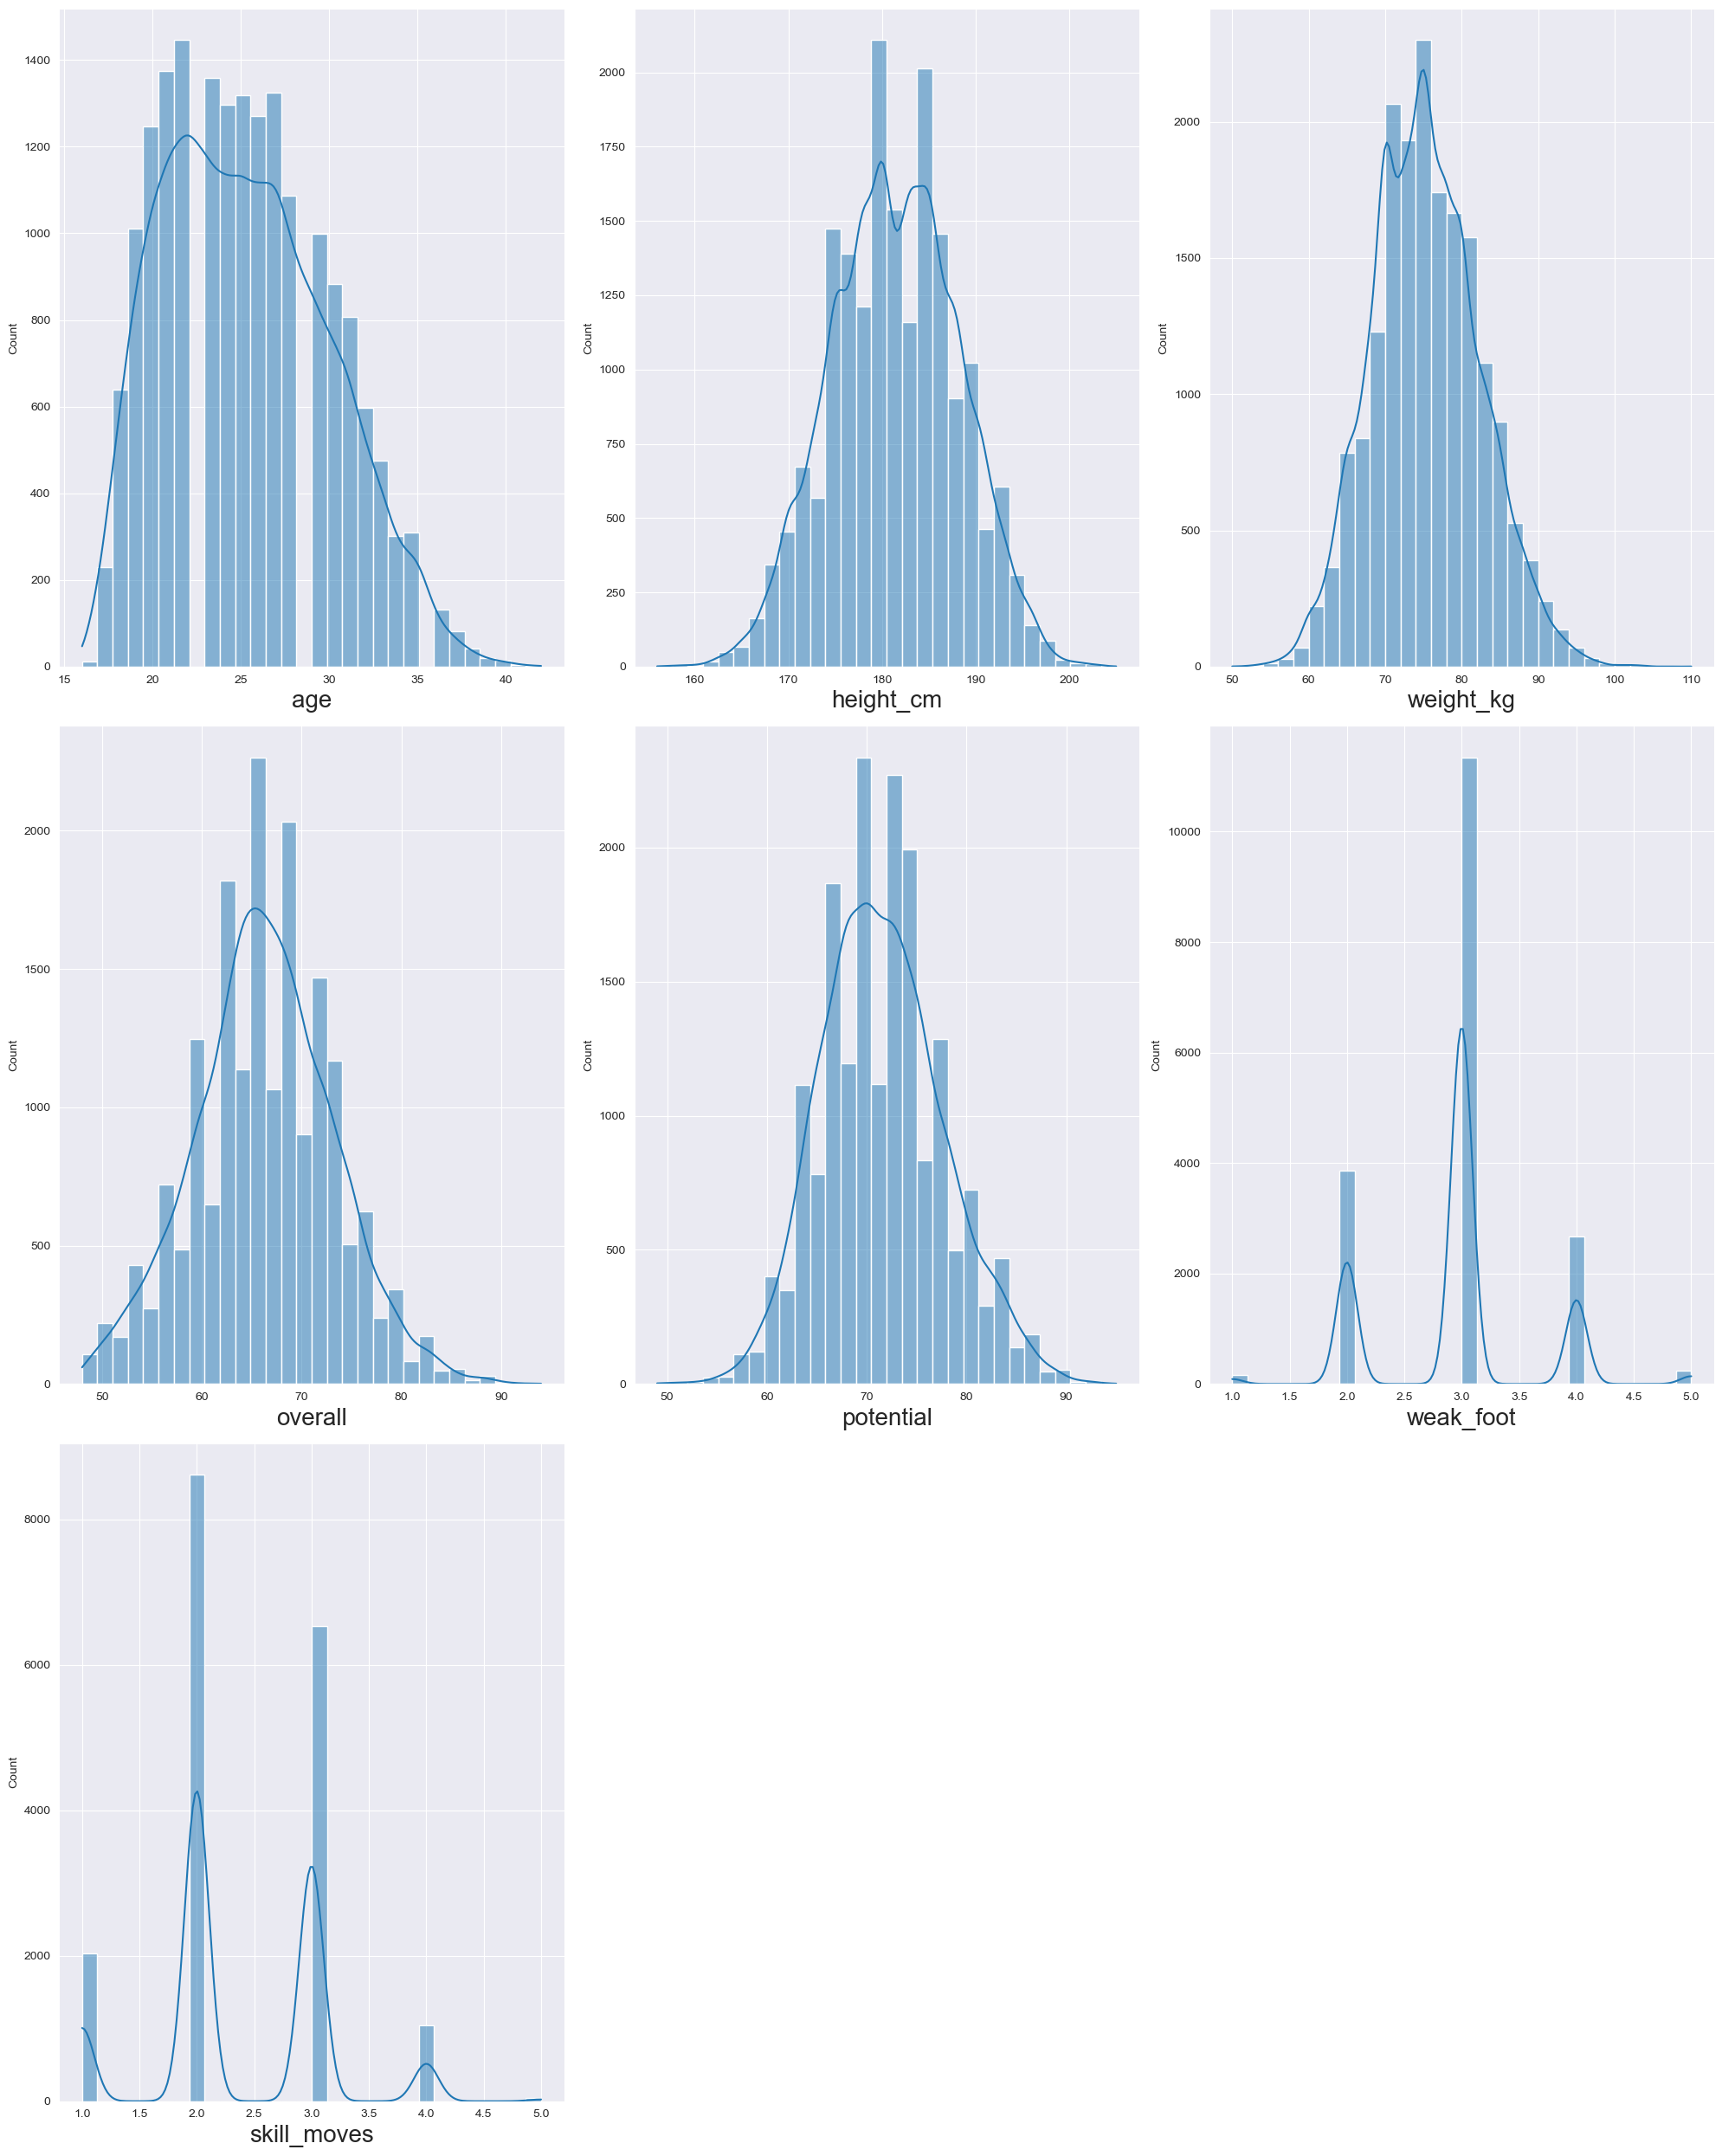

In [126]:
feature_1 = data[['age','height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot', 'skill_moves']]
plt.figure(figsize=(20,25)) 
plot1=1
for column in feature_1:
    if plot1<=8:    
        plt.subplot(3,3,plot1) 
        sns.histplot(x=feature_1[column],bins=30,kde=True)
        plt.xlabel(column,fontsize=20)
    plot1+=1
plt.tight_layout()
plt.show()

### Our insights:

* Here we see that the age column in our dataset is slightly skewed towards the right.

* Also we observe that most of the players in our dataset in between the ages of 20 - 27.
* The 'height_cm', 'weight_kg', 'overall','potential' columns are having very little skew and looking more or less normally       distributed.

* The 'weak_foot' and 'skill_moves' columns are categories that signifies a players ratings in that category. We see that most     players have ratings 3 and 2 in weak_foot and skill_moves respectively.

### Visualizing the distribution of income of players

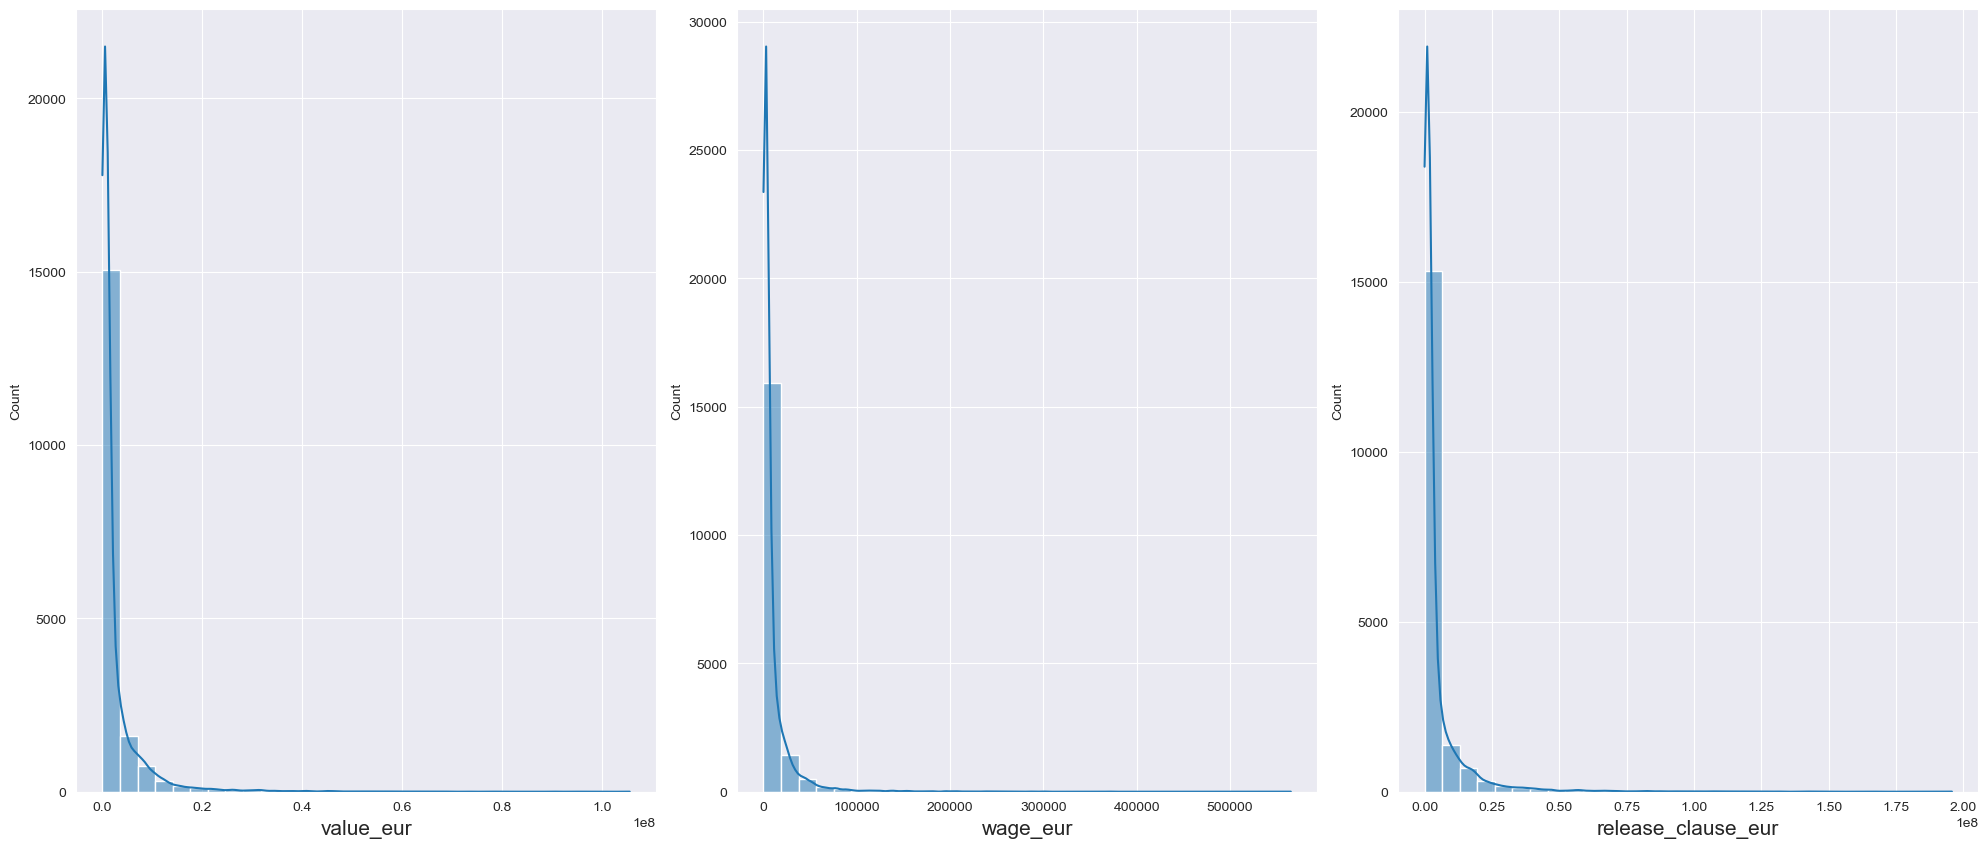

In [127]:
feature_2 = data[['value_eur','wage_eur','release_clause_eur']]
plt.figure(figsize=(20,25))
plotn=1
for column in feature_2:
    if plotn<4:
        plt.subplot(3,3,plotn)
        sns.histplot(x=feature_2[column],bins=30,kde=True)
        plt.xlabel(column,fontsize=15)
    plotn+=1
plt.tight_layout()
plt.show()

### Our insights:

* Here we see that the all these features are right skewed.

* Most of the players in our dataset are earning (wage_eur) between 0 to 90000

### Visualizing the distribution of skills of players

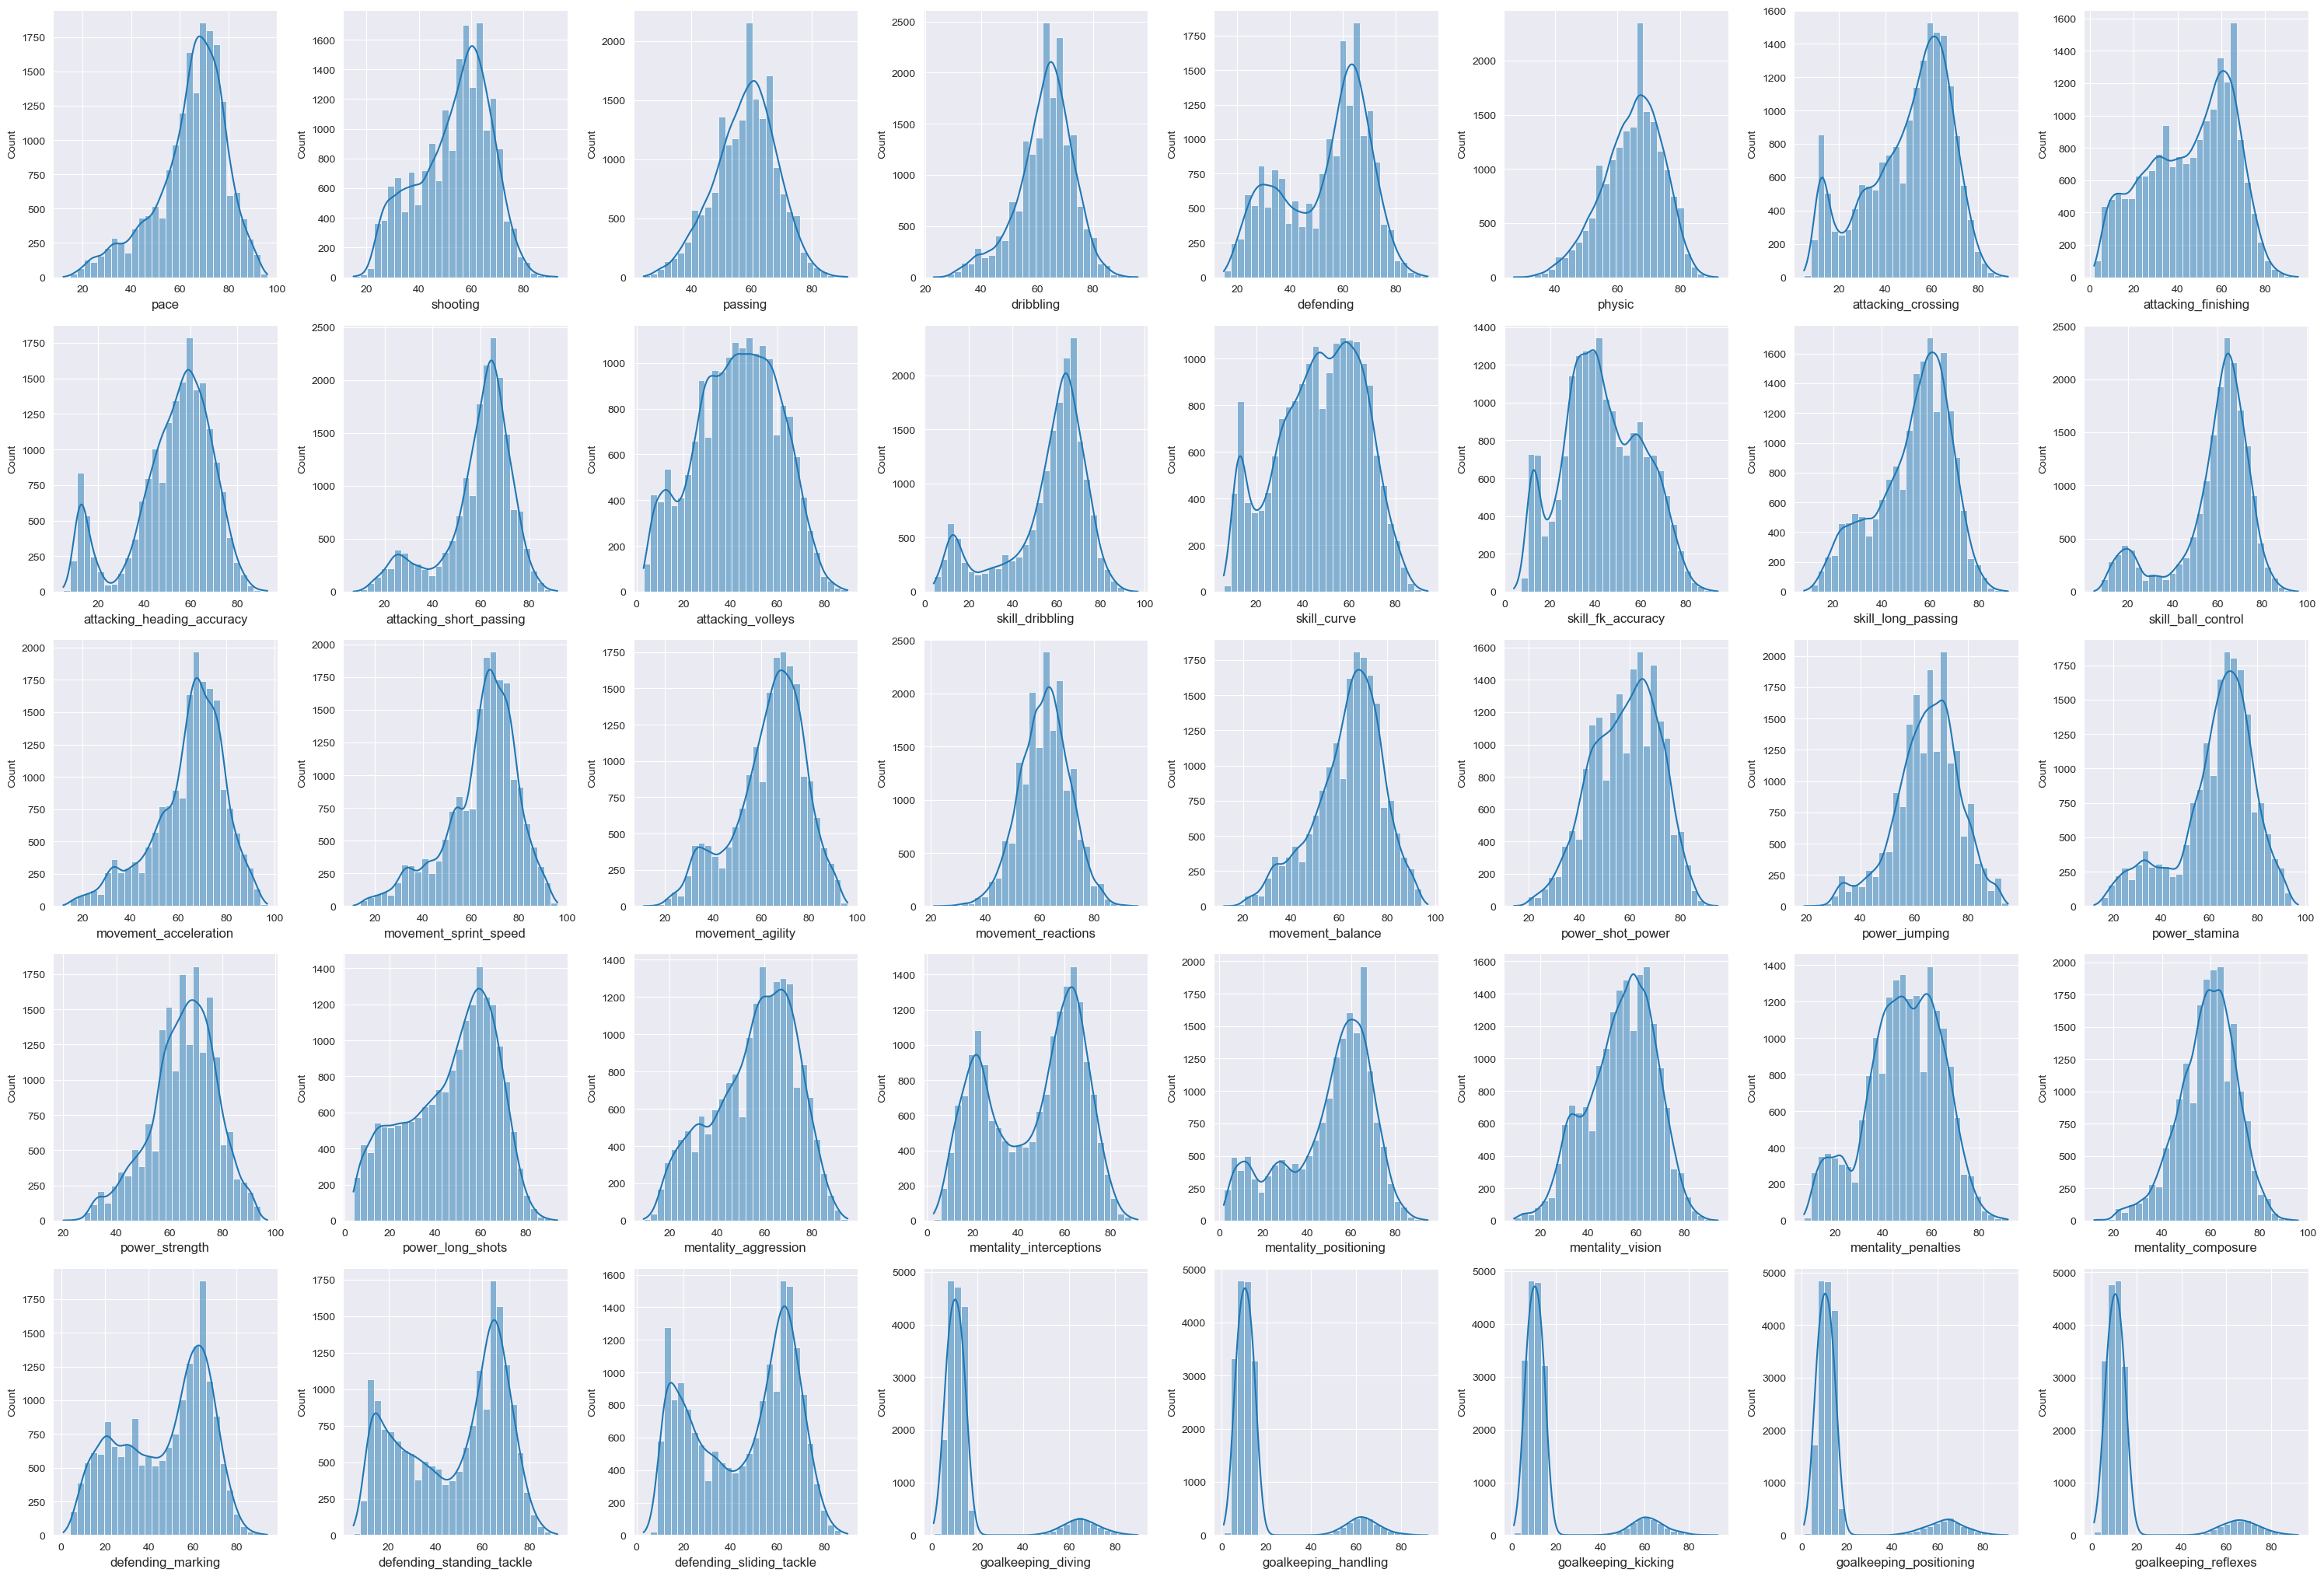

In [128]:
feature_3= data[['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
                 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
                 'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed',
                 'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                 'mentality_vision','mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
                 'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                 'goalkeeping_reflexes']]

plt.figure(figsize=(30,24))
plotn=1
for column in feature_3:
    if plotn<50:
        plt.subplot(6,8,plotn)
        sns.histplot(x=feature_3[column],bins=30,kde=True)
        plt.xlabel(column,fontsize=12)
    plotn+=1
plt.tight_layout()
plt.show()

### Our insights:

* pace,shooting,passing,dribbling,physic,gk_diving, gk_handling,gk_positioning,gk_kicking,gk_reflexes, gk_speed,                   attacking_heading_accuracy, nation_jersy_number, attacking_volleys, skill_curve, skill_fk_accuracy, movement_reactions,         movement_balance, power_shot_power, power_jumping, power_strenght, mentality_aggression, mentality_interception,                 mentality_vision, mentality_penalties, mentality_composure, these are the columns in dataset having slightly skewed             distribution.

* goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes these are the       columns in the dataset having right skewed distribution.

* defending, attacking_crossing, attacking_finishing, attacking_shot_passing, skill_dribbling, skill_long_passing,                 skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility,power_stamina, power_long_shot,               mentality_positioning, defending_marking, defending_standing_tackle, defending_sliding_tackle these are the columns in the       dataset having left skewed distribution.

### Visualizing the categorical columns

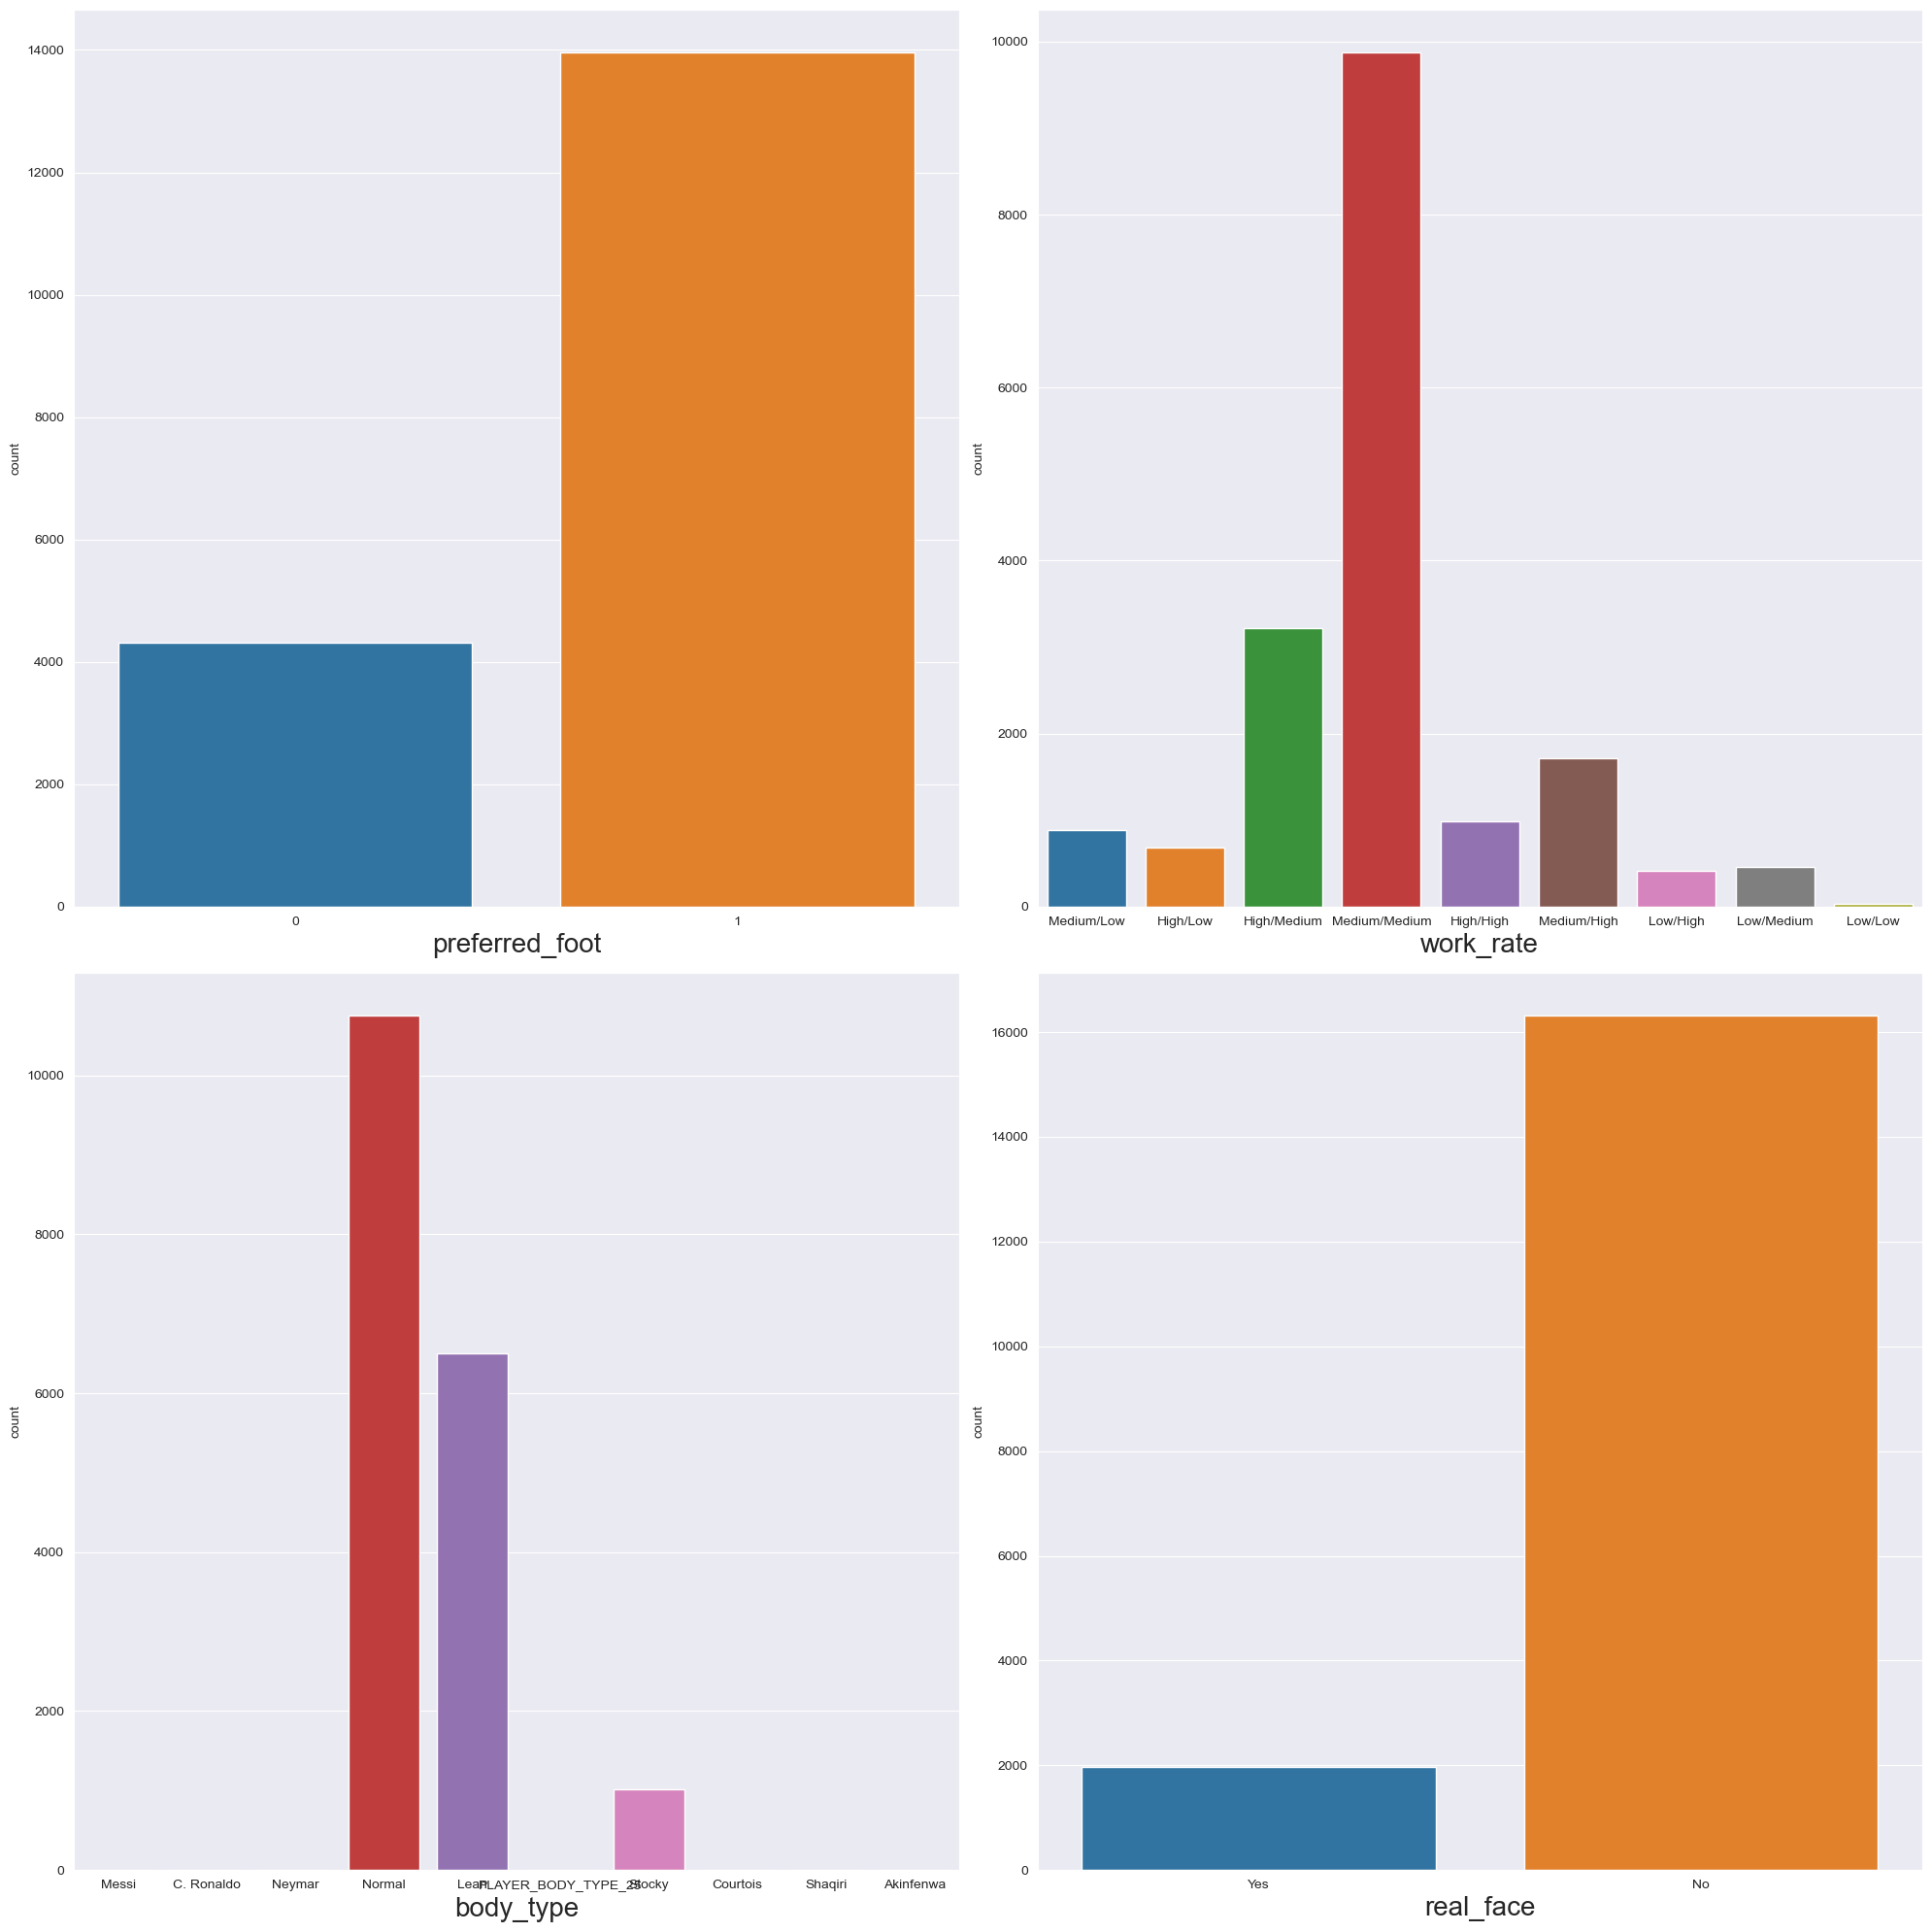

In [129]:
col_1 = data[['preferred_foot','work_rate','body_type','real_face']]
plt.figure(figsize=(20,20))
plotn=1
for column in col_1:
    if plotn<5:
        plt.subplot(2,2,plotn)
        sns.countplot(x=col_1[column])
        plt.xlabel(column,fontsize=20)
    plotn+=1
plt.tight_layout()
plt.show()

### Our insights:

1) Most of the players in our dataseet are right footed

2) Work_Rate of Medium/Medium has the highest number of observation amoung players in our dataset

3) Most of the players have a normal body type.

4) Real Face having 'NO' values the most.

## Bivariate Analysis

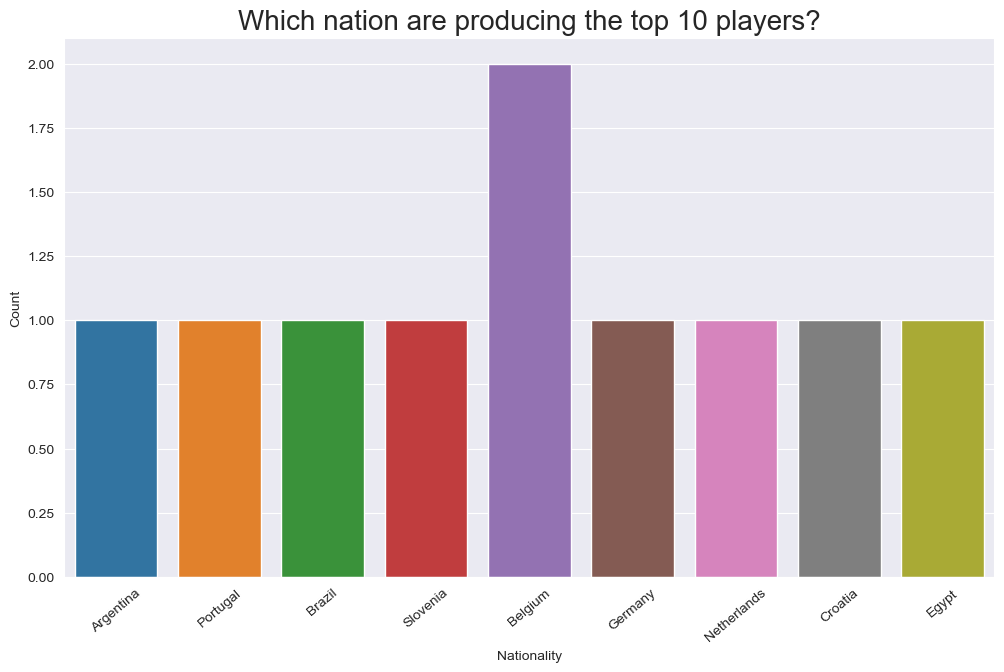

In [130]:
plt.figure(figsize=(12,7))
sns.countplot(x="nationality",data=data.head(10))
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.title("Which nation are producing the top 10 players?", fontsize = 20)
plt.xticks(rotation=40)
plt.show()

### Our Insights:

1) We see that Belgium is producing more players compare to other in our top ten players dataset

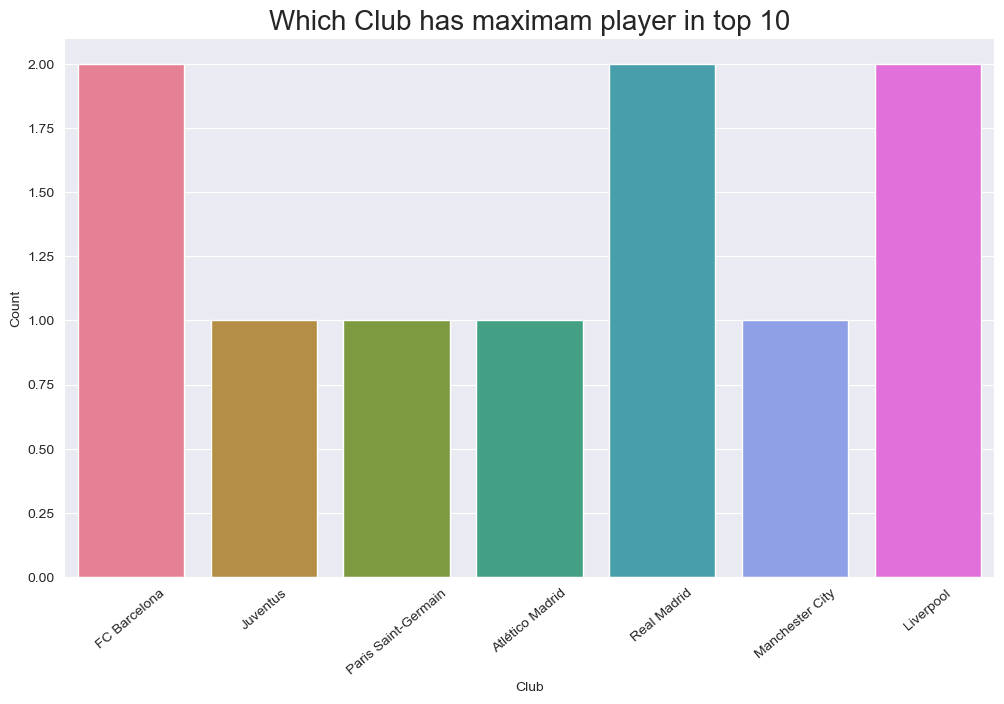

In [131]:
plt.figure(figsize=(12,7))
sns.countplot(x="club",data=data.head(10),palette="husl")
plt.xlabel("Club")
plt.ylabel("Count")
plt.title("Which Club has maximam player in top 10",fontsize=20)
plt.xticks(rotation=40)
plt.show()

### Our Insights:

1) most of the Fc Barcelona. real madrid, and liver pool club player in top 10.

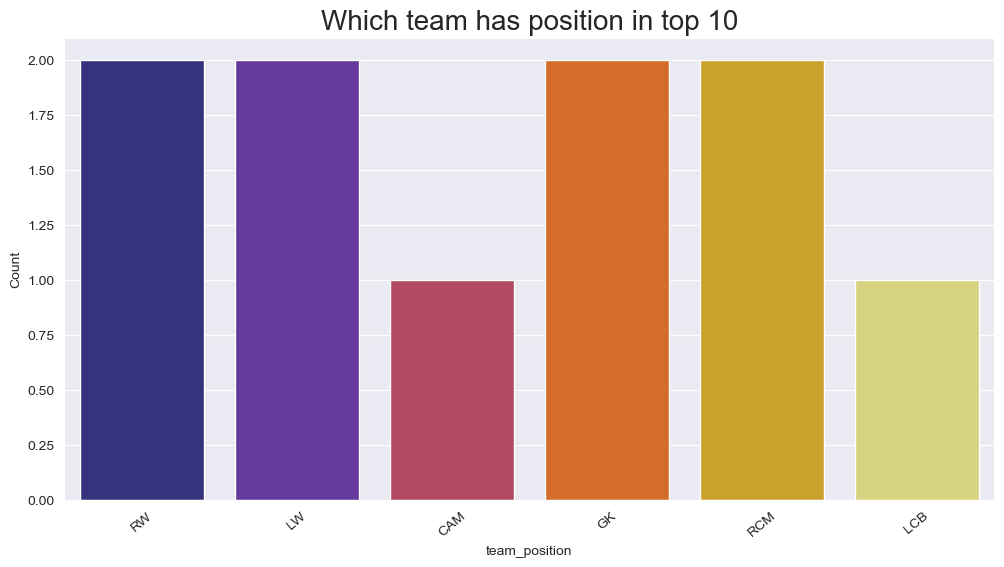

In [132]:
plt.figure(figsize=(12,6))
sns.countplot(x="team_position",data=data.head(10),palette="CMRmap")
plt.xlabel("team_position")
plt.ylabel("Count")
plt.title("Which team has position in top 10",fontsize=20)
plt.xticks(rotation=40)
plt.show()

### Our Insights:

1) Most of the RW, LW, GK, RCM team position in top 10

### Impact of international reputation to weak foot 

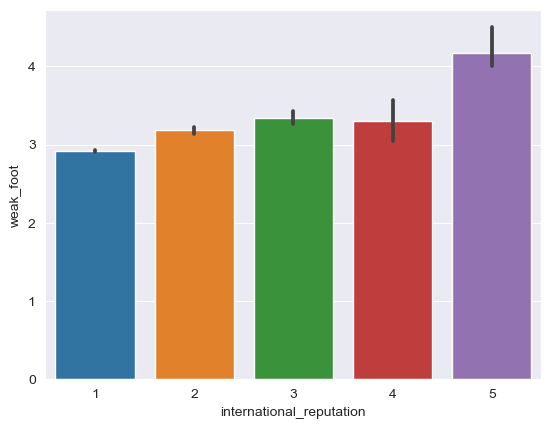

In [133]:
sns.barplot(x="international_reputation",y="weak_foot",data=data)
plt.show()

### Our Insights:

* 5 Intrenational reputation rating of player has more than 4 week foot
* 1 international reputation rating player has less than 3 weak foot
* 2, 3, 4 international reputation player has constant weak foot

### Visualizing the relationship of a players' international reputation vs their overall rating

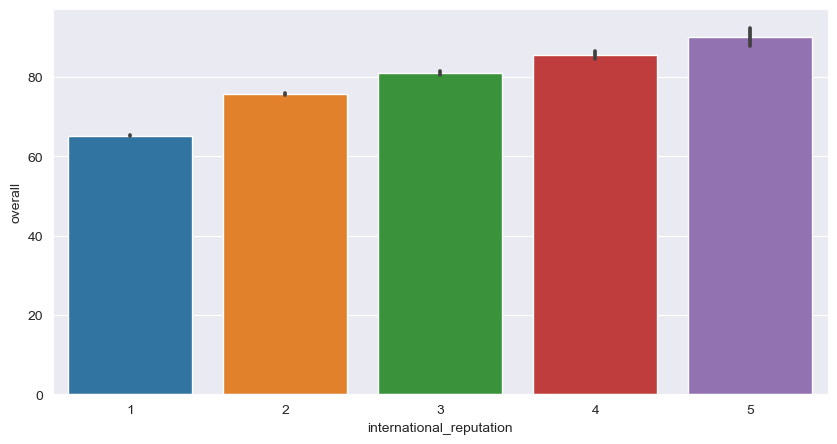

In [134]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='international_reputation',y='overall')
plt.show()

In [135]:
IR=data.groupby(['international_reputation']).overall.mean()
IR

international_reputation
1    65.273133
2    75.835965
3    81.157534
4    85.586957
5    90.166667
Name: overall, dtype: float64

### Our Insights:

1) The players having 5 international_reputation will have overall rating on an avg of 90.166

2) The players having 1 international_reputation will have overall rating on an avg of 65.27

### Finding out the income of our top ten players

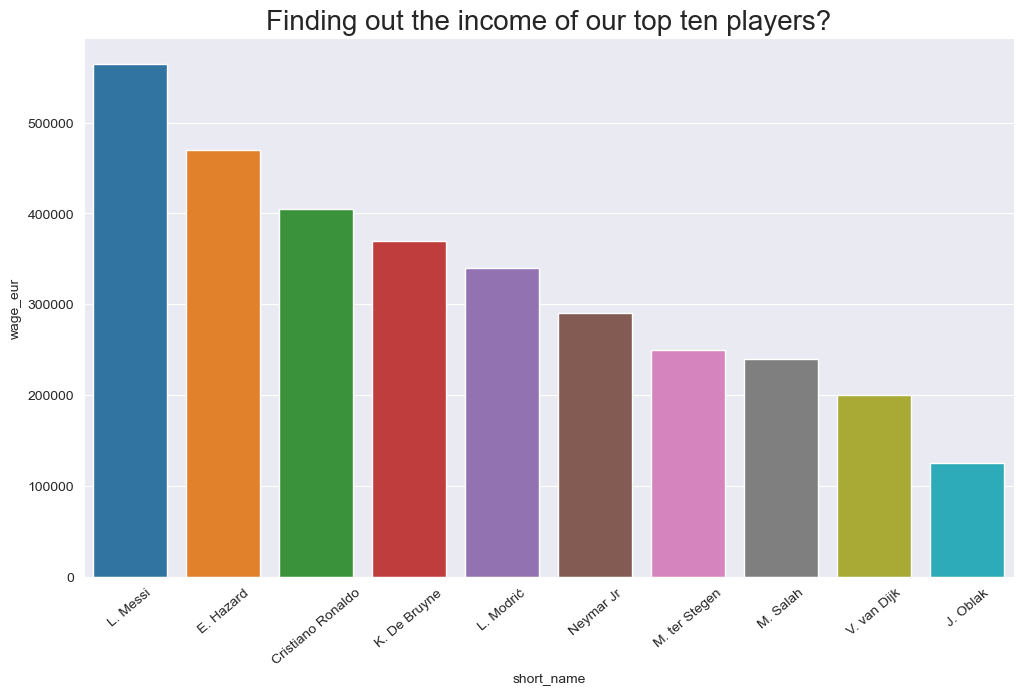

In [136]:
plt.figure(figsize=(12,7))
sns.barplot(x="short_name",y="wage_eur",data=data.head(10).sort_values(by='wage_eur',ascending=False))
plt.xlabel("short_name")
plt.ylabel("wage_eur")
plt.title("Finding out the income of our top ten players?", fontsize = 20)
plt.xticks(rotation=40)
plt.show()

### Our Insights:

1) Here we see that Lionel Messi is getting paid the most.

### Finding the shooting capabilities of our top ten players

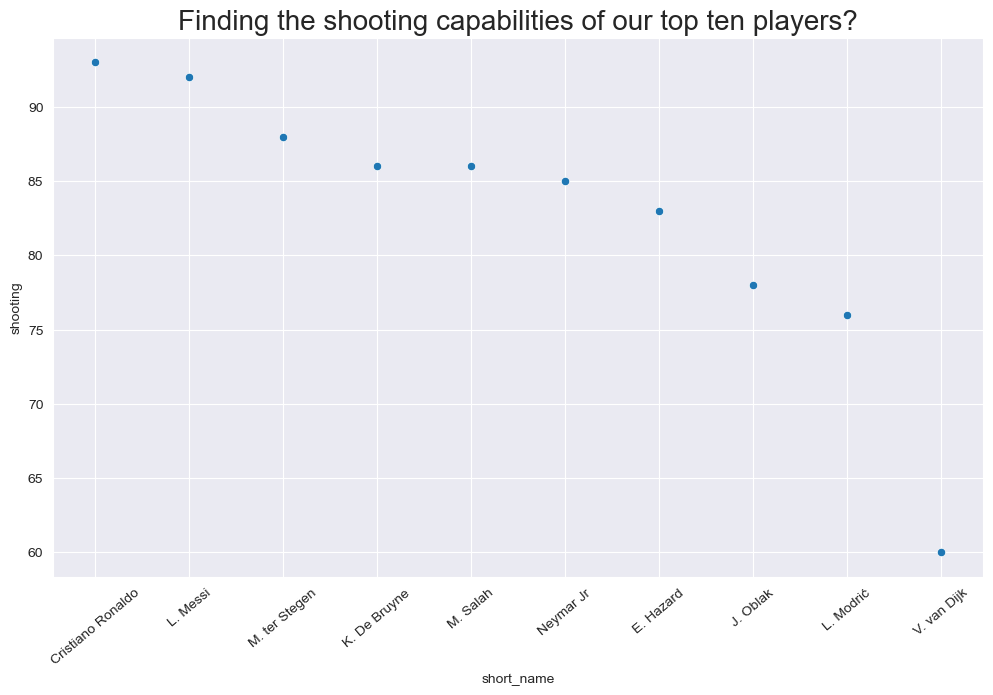

In [137]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="short_name",y="shooting",data=data.head(10).sort_values(by='shooting',ascending=False))
plt.xlabel("short_name")
plt.ylabel("shooting")
plt.title("Finding the shooting capabilities of our top ten players?", fontsize = 20)
plt.xticks(rotation=40)
plt.show()

### Our Insights:

1) Here we see that unsuprizingly Cristiano Ronaldo has the top rating for shooting capabilities

### Finding the dribbling capabilities of our top ten players

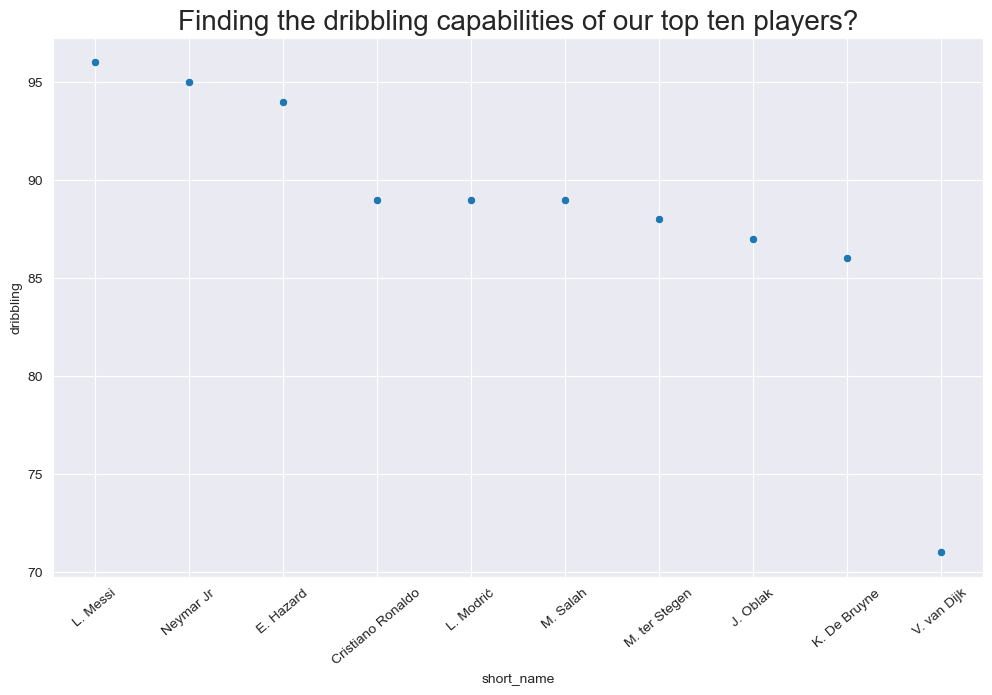

In [138]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="short_name",y="dribbling",data=data.head(10).sort_values(by='dribbling',ascending=False))
plt.xlabel("short_name")
plt.ylabel("dribbling")
plt.title("Finding the dribbling capabilities of our top ten players?", fontsize = 20)
plt.xticks(rotation=40)
plt.show()

### Our Insights:

1) Here we see that Lionel Messi has the top rating for dribbling capabilities

### Finding the attacking finishing capabilities of our top ten players

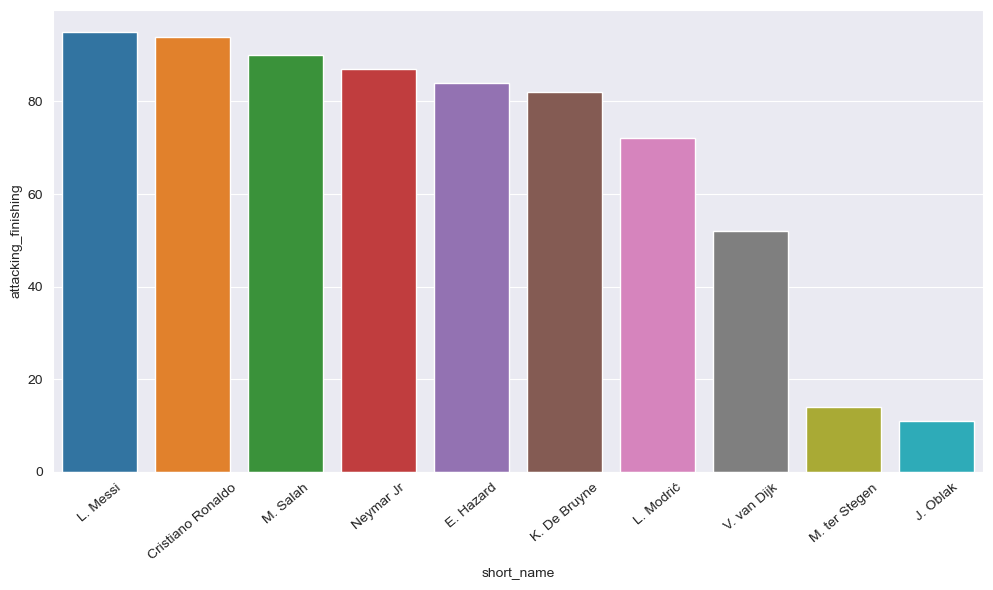

In [139]:
plt.figure(figsize=(12,6))
sns.barplot(x="short_name",y="attacking_finishing",data=data.head(10).sort_values(by='attacking_finishing',ascending=False))
plt.xlabel("short_name")
plt.ylabel("attacking_finishing")
plt.xticks(rotation=40)
plt.show()

### Our Insights:


1) Here we see that Lionel Messi has the top rating for attacking finishing capabilities

### Finding the highest paid offensive players

In [140]:
fifa_df = data.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
def find_most_earnings_player(position):
    forwards_df = fifa_df[(df["team_position"] == 'LW') | (fifa_df["team_position"] == 'RW')| (fifa_df["team_position"] == 'ST')]
    name = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][2]
    wage = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][12]
    if position == 'LW':
        position = 'left winger'
    elif position == 'ST':
        position = 'striker'
    else:
        position = 'right winger'
    print(f'{name} is highest paid {position} with a wage of {wage} euros')
    

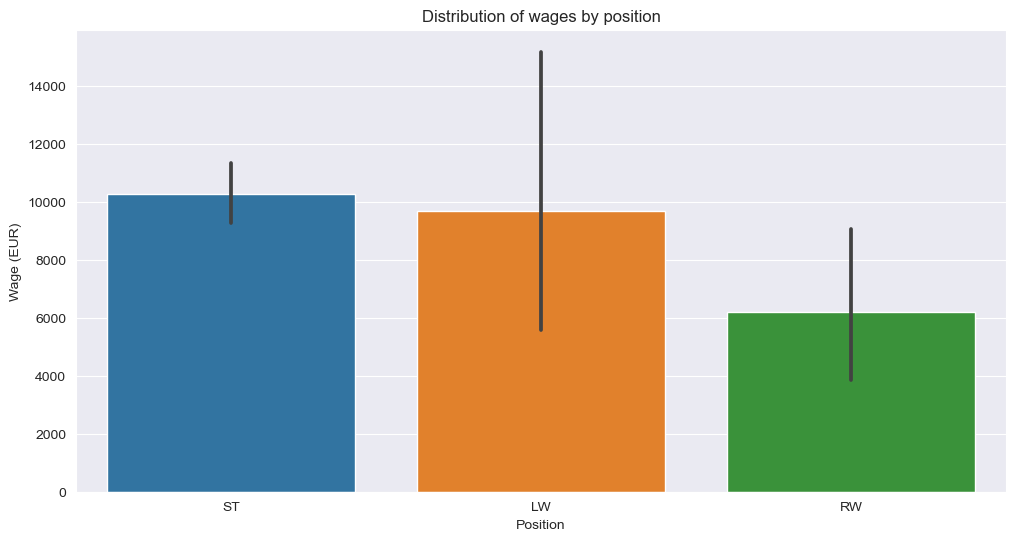

In [141]:
plt.figure(figsize = (12,6))

# Create a new column to store the position
forwards_df = fifa_df[(fifa_df["player_positions"] == 'LW') | (fifa_df["player_positions"] == 'RW')| (fifa_df["player_positions"] == 'ST')]

sns.barplot(x="player_positions", y="wage_eur", data=forwards_df)
plt.xlabel("Position")
plt.ylabel("Wage (EUR)")
plt.title("Distribution of wages by position")
plt.show()

### Our Insights:

1) From the barplot we can see that on an average the striker players are getting paid the most

### Finding the potential of the players with respect to their age.

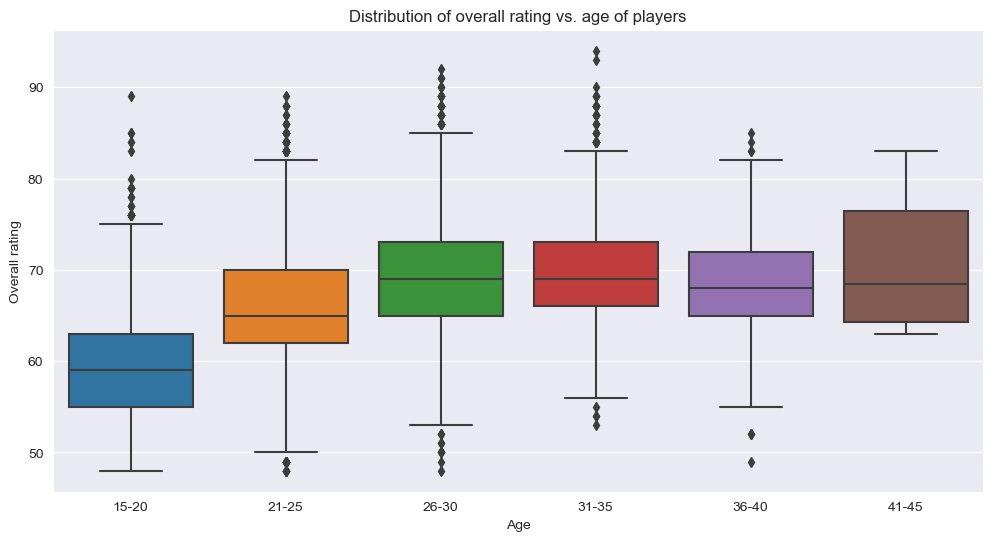

In [142]:
fifa_df = data.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
plt.figure(figsize = (12,6))
sns.boxplot(x=fifa_df["Age Group"], y=fifa_df["overall"])
plt.xlabel("Age")
plt.ylabel("Overall rating")
plt.title("Distribution of overall rating vs. age of players")
plt.show()

In [143]:
# Use mannual encoding because lots of labels avialble
data.team_position = data.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

### Our Insights:

1) Here we may conclude that the more the aged the player become the more they lose their potential.

In [144]:
Feature = data[["short_name","overall","potential","pace","shooting","passing",'dribbling','defending','physic']]
compare=Feature.head(2)
compare = compare.set_index('short_name')
compare.head()

overall  potential  pace  shooting  passing  dribbling  \
short_name                                                                  
L. Messi                94         94  87.0      92.0     92.0       96.0   
Cristiano Ronaldo       93         93  90.0      93.0     82.0       89.0   

                   defending  physic  
short_name                            
L. Messi                39.0    66.0  
Cristiano Ronaldo       35.0    78.0

In [145]:
data.sort_values(by=["value_eur","release_clause_eur"],ascending=[0,1]).head()

player_url    short_name  \
2   https://sofifa.com/player/190871/neymar-da-sil...     Neymar Jr   
0   https://sofifa.com/player/158023/lionel-messi/...      L. Messi   
10  https://sofifa.com/player/231747/kylian-mbappe...     K. Mbappé   
5   https://sofifa.com/player/192985/kevin-de-bruy...  K. De Bruyne   
4   https://sofifa.com/player/183277/eden-hazard/2...     E. Hazard   

                         long_name  age         dob  height_cm  weight_kg  \
2    Neymar da Silva Santos Junior   27  1992-02-05        175         68   
0   Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   
10                   Kylian Mbappé   20  1998-12-20        178         73   
5                  Kevin De Bruyne   28  1991-06-28        181         70   
4                      Eden Hazard   28  1991-01-07        175         74   

   nationality                 club  overall  ...  lwb  ldm  cdm rdm  rwb  lb  \
2       Brazil  Paris Saint-Germain       92  ...   66   61   61  61   66  61   
0    Argentina         FC Barcelona       94  ...   68   66   66  66   68  63   
10      France  Paris Saint-Germain       89  ...   66   62   62  62   66  63   
5      Belgium      Manchester City       91  ...   77   77   77  77   77  73   
4      Belgium          Real Madrid       91  ...   66   63   63  63   66  61   

    lcb  cb rcb  rb  
2    46  46  46  61  
0    52  52  52  63  
10   54  54  54  63  
5    66  66  66  73  
4    49  49  49  61  

[5 rows x 95 columns]

## OUTLIER HANDLING

In [2]:
outlier = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic',"passing"]]
plt.figure(figsize=(20,25))
plotnumber=1
for colum in outlier:
    if plotnumber<=14:
        plt.subplot(5,3,plotnumber)
        sns.boxplot(x=outlier[colum])
        plt.xlabel(colum,fontsize=20)
        plotnumber+=1
        plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

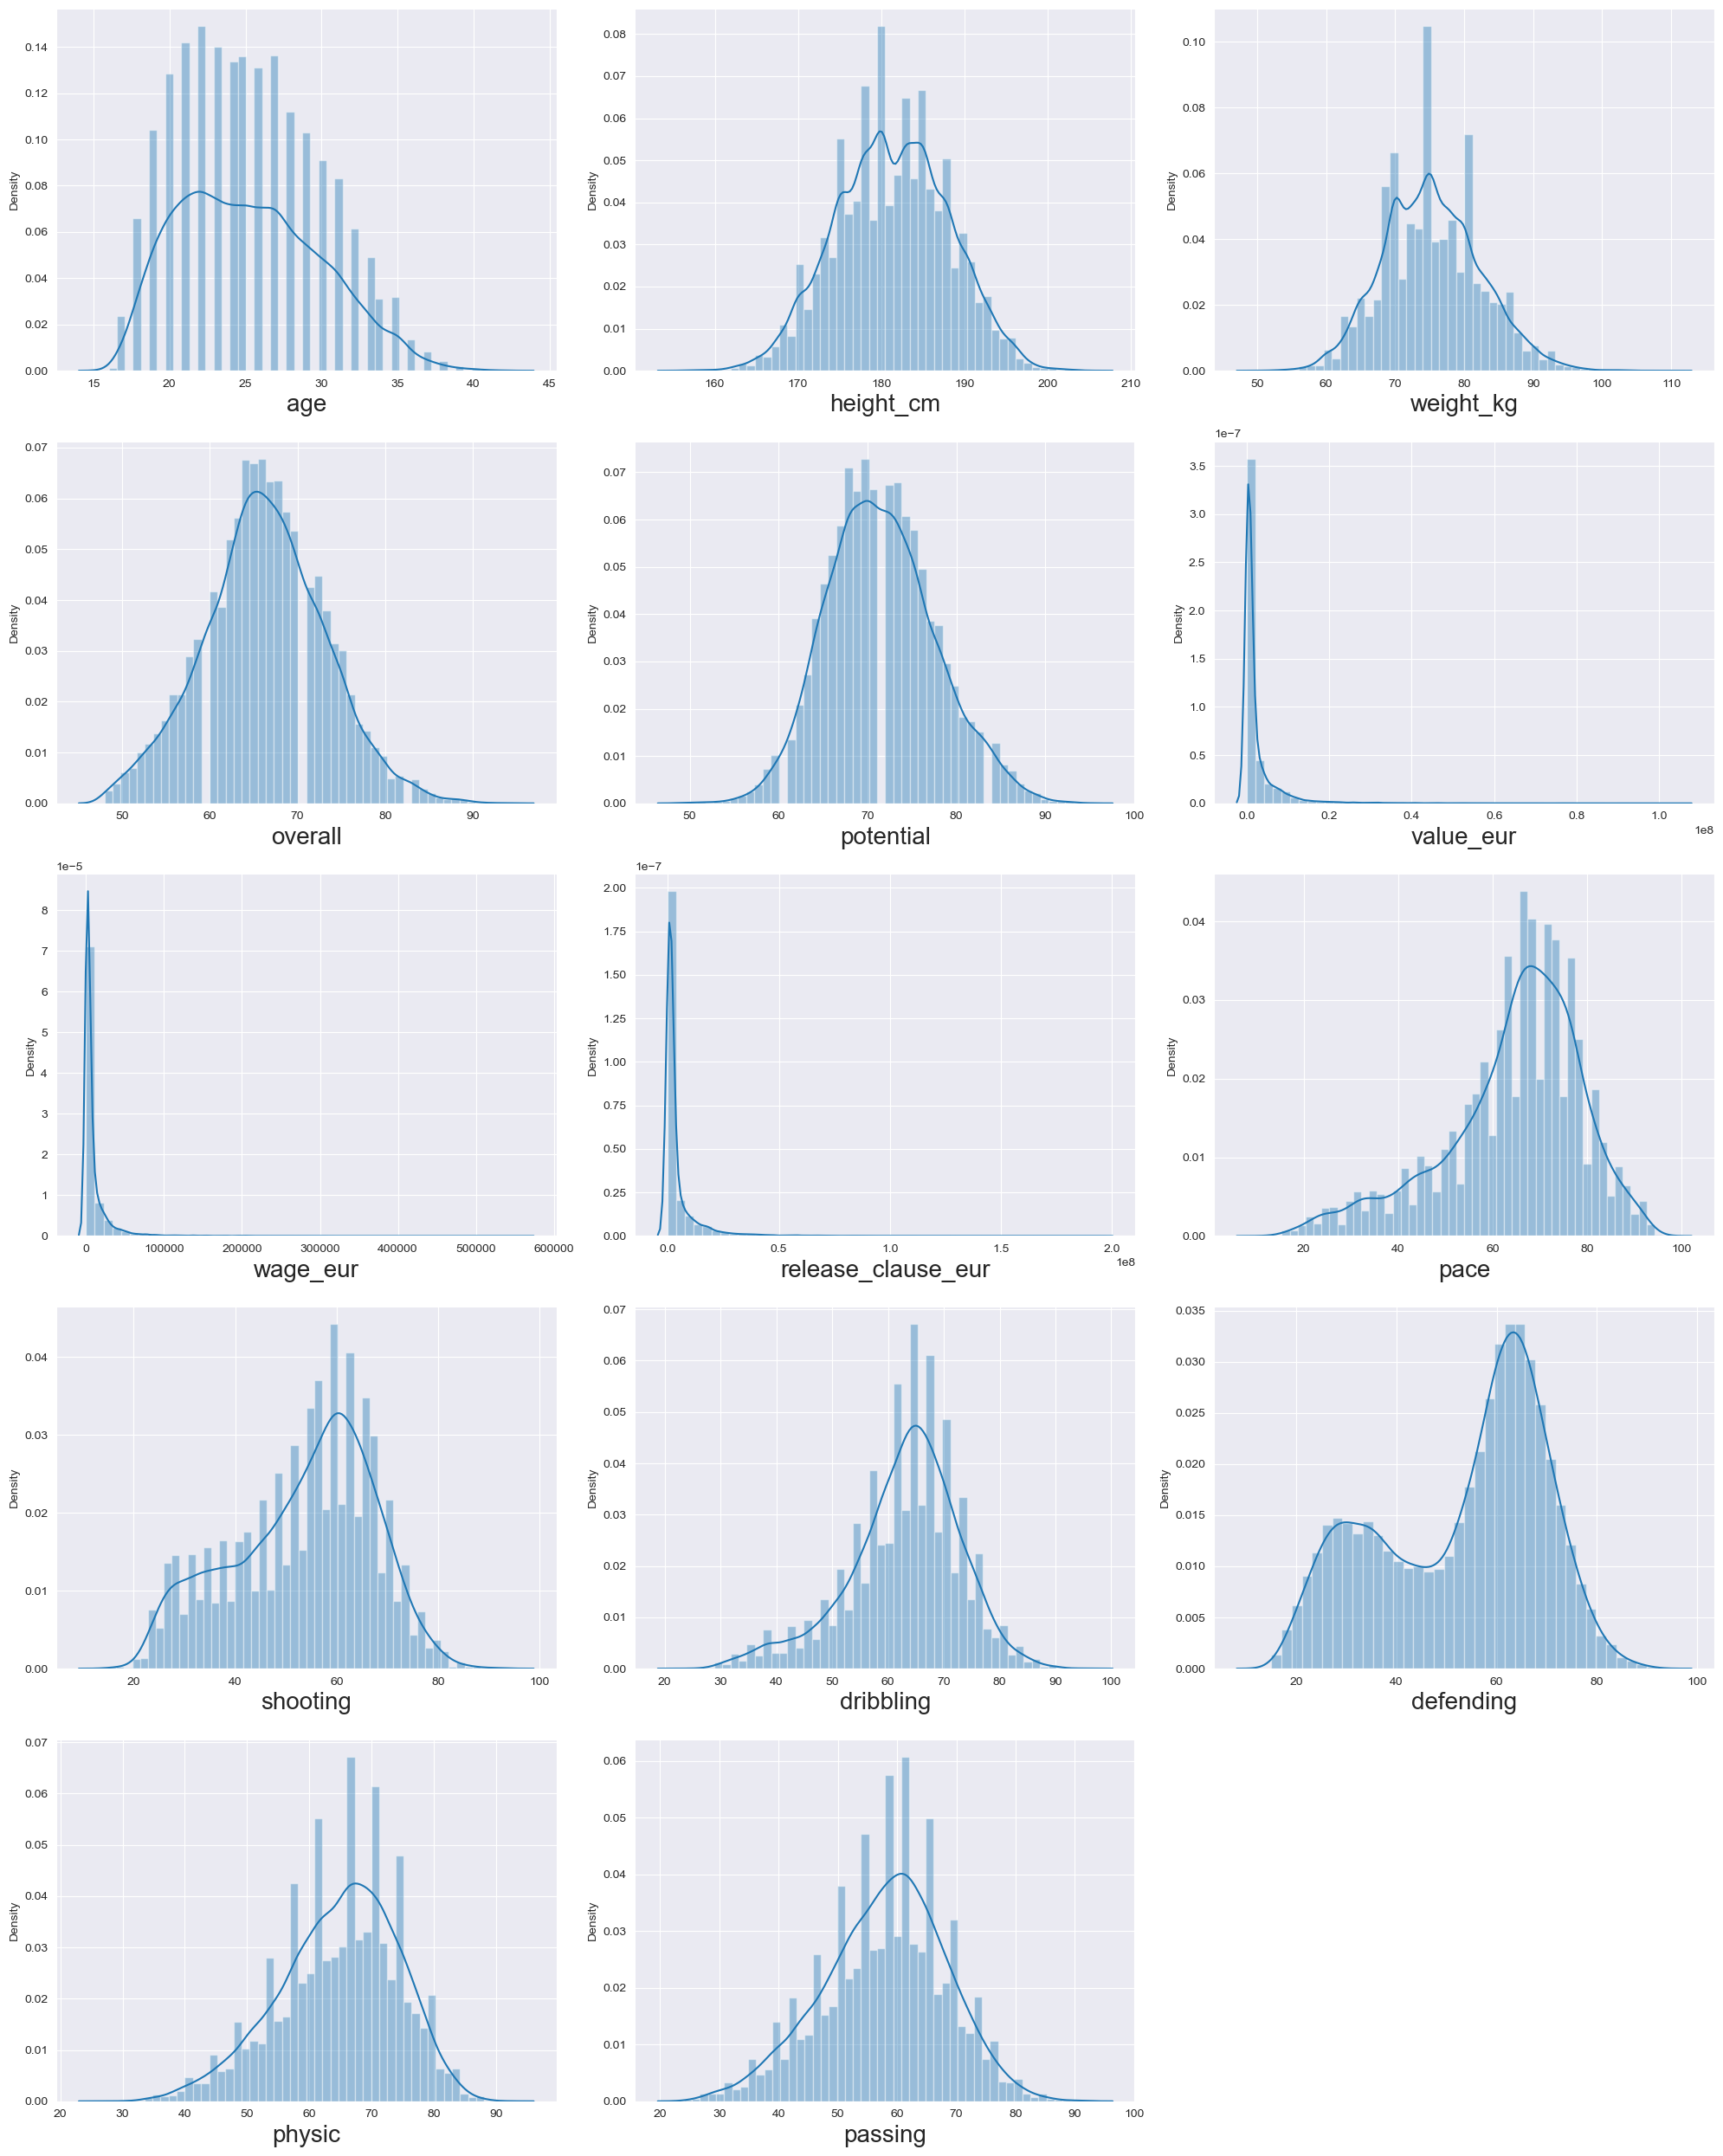

In [147]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in outlier: # iteration of columns / acessing the columns from  dataset 
    if plotno<=15:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=outlier[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

### 3 STANDARD DEVIATION RULE TO DETECT THE OUTLIER

In [148]:
upper_limit=data.age.mean() + 3*data.age.std()
print("Upper_limit :",upper_limit)
lower_limit=data.age.mean() - 3*data.age.std()
print("Lower_limit :",lower_limit)
len(data.loc[data['age'] > upper_limit])/18278*100

Upper_limit : 39.25418488202056
Lower_limit : 11.312397895088532


0.10395010395010396

In [149]:
data.loc[data['age'] > upper_limit,'age']=data['age'].mean()

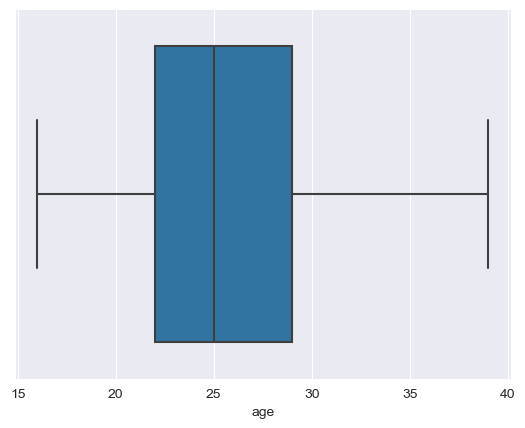

In [150]:
sns.boxplot(x="age",data=data)
plt.show()

In [151]:
upper_limit = data.height_cm.mean() + 3*data.height_cm.std()
print("Upper limit:",upper_limit)
lower_limit = data.height_cm.mean() - 3*data.height_cm.std()
print("Lower limit:",lower_limit)
len(data.loc[data['height_cm'] > upper_limit])/18278*100

Upper limit: 201.6330681374958
Lower limit: 161.09129995529332


0.06018163912900754

In [152]:
data.loc[data['height_cm'] <  lower_limit,'height_cm'] = data['height_cm'].mean()
data.loc[data['height_cm'] > upper_limit,'height_cm'] = data['height_cm'].mean()

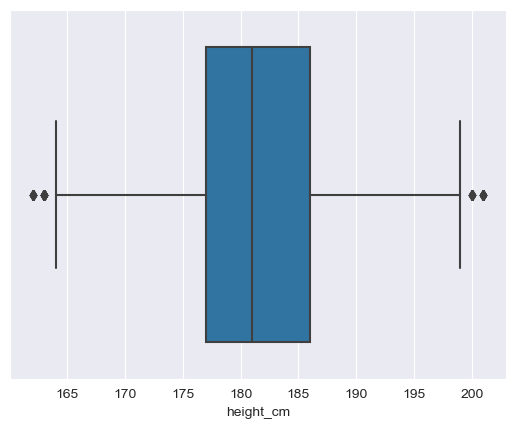

In [153]:
sns.boxplot(x="height_cm",data=data)
plt.show()

In [154]:
upper_limit = data.weight_kg.mean() + 3*data.weight_kg.std()
print("Upper limit:",upper_limit)
lower_limit = data.weight_kg.mean() - 3*data.weight_kg.std()
print("Lower limit:",lower_limit)
# Lower limit percentage
len(data.loc[data['weight_kg'] < lower_limit])/18278*100
# upper limit percentage
len(data.loc[data['weight_kg'] > upper_limit])/18278*100

Upper limit: 96.41957385582987
Lower limit: 54.13311243369853


0.22431338220811906

In [155]:
data.loc[data['weight_kg'] < lower_limit,'weight_kg']=data['weight_kg'].mean()
data.loc[data['weight_kg'] > upper_limit,'weight_kg']=data['weight_kg'].mean()

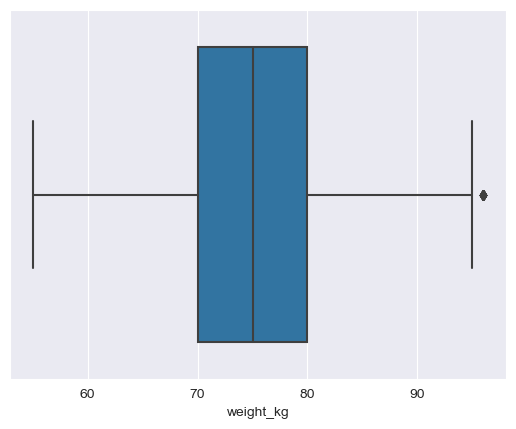

In [156]:
sns.boxplot(x="weight_kg",data=data)
plt.show()

In [157]:
upper_limit = data.overall.mean() + 3*data.overall.std()
print("Upper limit:",upper_limit)
lower_limit = data.overall.mean() - 3*data.overall.std()
print("Lower limit:",lower_limit)
len(data.loc[data['overall'] > upper_limit])/18278*100

Upper limit: 87.09485374672605
Lower limit: 45.395134216946126


0.218842324105482

In [158]:
data.loc[data['overall'] > upper_limit, 'overall'] = data['overall'].mean()

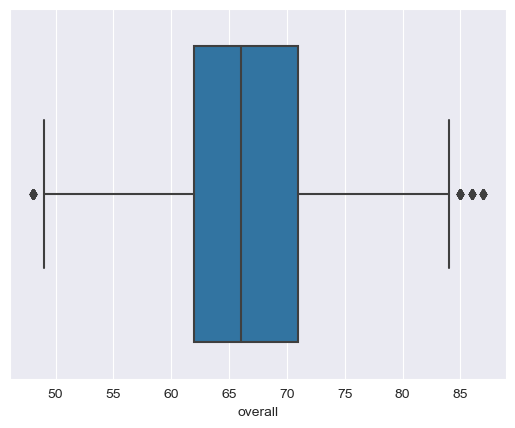

In [159]:
sns.boxplot(x="overall",data=data)
plt.show()

In [160]:
upper_limit = data.potential.mean() + 3*data.potential.std()
print("Upper limit:",upper_limit)
lower_limit = data.potential.mean() - 3*data.potential.std()
print("Lower limit:",lower_limit)
# Lower limit
len(data.loc[data['potential'] < lower_limit])/18278*100
# upperlimit
len(data.loc[data['potential'] > upper_limit])/18278*100

Upper limit: 89.96589419280835
Lower limit: 53.12787974307086


0.21337126600284498

In [161]:
# impute outlier
data.loc[data['potential'] < lower_limit,'potential']=data['potential'].mean()
data.loc[data['potential'] > upper_limit,'potential']=data['potential'].mean()

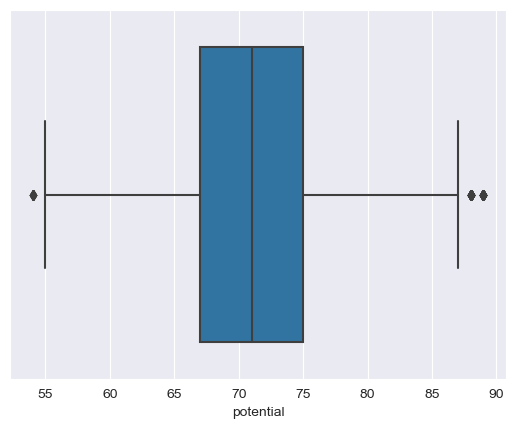

In [162]:
sns.boxplot(x="potential",data=data)
plt.show()

## IQR

In [163]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['value_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['value_eur'].quantile(0.25)  # first quantile
Q3 = data['value_eur'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)
len(data.loc[data['value_eur'] > max_limit])/18278*100

IQR 1775000.0
325000.0
2100000.0
minimum limit -2337500.0
maximum limit 4762500.0


13.737826895721634

In [164]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['wage_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['wage_eur'].quantile(0.25)  # first quantile
Q3 = data['wage_eur'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)

max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)
len(data.loc[data['wage_eur'] > max_limit])/18278*100

IQR 7000.0
1000.0
8000.0
minimum limit -9500.0
maximum limit 18500.0


12.911697122223437

In [165]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['release_clause_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['release_clause_eur'].quantile(0.25)  # first quantile
Q3 = data['release_clause_eur'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)
len(data.loc[data['release_clause_eur'] > max_limit])/18278*100# Use iqr because of some left skewed in data

IQR 2604000.0
596000.0
3200000.0
minimum limit -3310000.0
maximum limit 7106000.0


15.368202210307475

In [166]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['pace'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['pace'].quantile(0.25)  # first quantile
Q3 = data['pace'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

# min limit
len(data.loc[data['pace'] < min_limit])/18278*100
# max limit
len(data.loc[data['pace'] > max_limit])/18278*100

IQR 17.0
57.0
74.0
minimum limit 31.5
maximum limit 99.5


0.0

In [167]:
# impute outlier both side
data.loc[data['pace'] < min_limit,'pace'] = data['pace'].median()
data.loc[data['pace'] > max_limit,'pace'] = data['pace'].median()

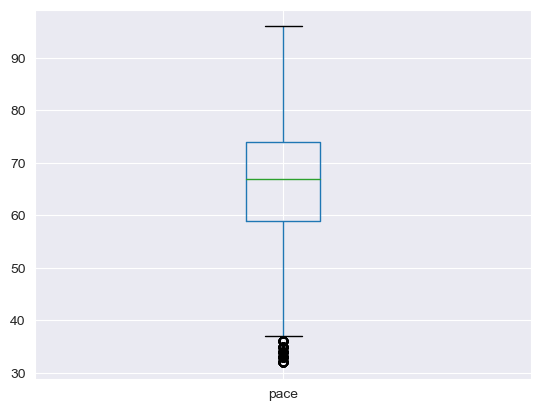

In [168]:
data.boxplot('pace')
plt.show()

In [169]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['passing'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['passing'].quantile(0.25)  # first quantile
Q3 = data['passing'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)
# min limit percentage
len(data.loc[data['passing'] < min_limit])/18278*100
# max limit percentage
len(data.loc[data['passing'] > max_limit])/18278*100

IQR 14.0
51.0
65.0
minimum limit 30.0
maximum limit 86.0


0.09300798774482985

In [170]:
# impute the outlier
data.loc[data['passing'] < min_limit,'passing'] = data['passing'].median()
data.loc[data['passing'] > max_limit,'passing'] = data['passing'].median()

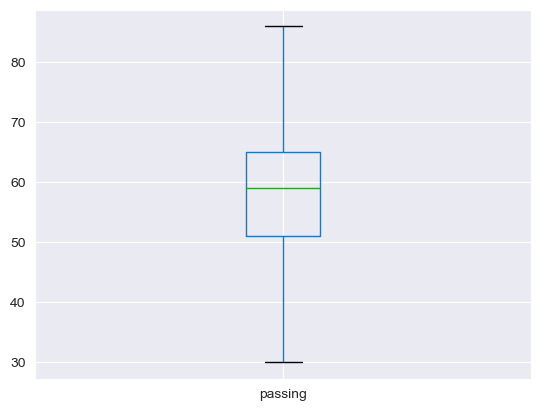

In [171]:
# boxplot
data.boxplot('passing')
plt.show()

In [172]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['shooting'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['shooting'].quantile(0.25)  # first quantile
Q3 = data['shooting'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)
# min limit percentage
len(data.loc[data['shooting'] < min_limit])/18278*100
# max limit percentage
len(data.loc[data['shooting'] > max_limit])/18278*100

IQR 20.0
44.0
64.0
minimum limit 14.0
maximum limit 94.0


0.0

In [173]:
# impute the outlier
data.loc[data['shooting'] < min_limit,'shooting'] = data['shooting'].median()
data.loc[data['shooting'] > max_limit,'shooting'] = data['shooting'].median()

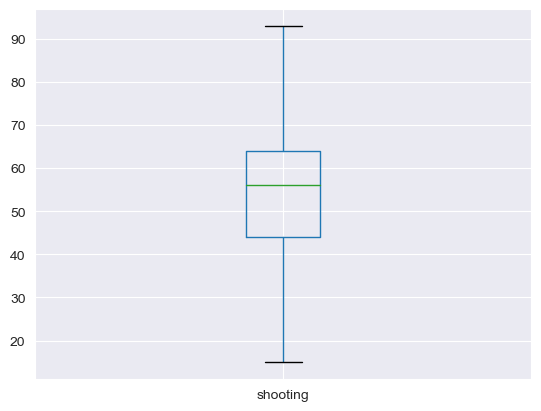

In [174]:
# boxplot
data.boxplot('shooting')
plt.show()

In [175]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['dribbling'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['dribbling'].quantile(0.25)  # first quantile
Q3 = data['dribbling'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)
# min limit percentage
print(len(data.loc[data['dribbling'] < min_limit])/18278*100)
# max limit percentage
print(len(data.loc[data['dribbling'] > max_limit])/18278*100)


IQR 11.0
58.0
69.0
minimum limit 41.5
maximum limit 85.5
4.048582995951417
0.4759820549294234


In [176]:
# impute outlier
data.loc[data['dribbling'] > max_limit,'dribbling']=data['dribbling'].median()

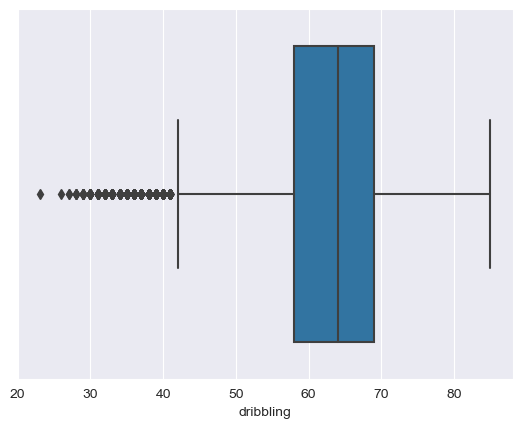

In [177]:
sns.boxplot(x="dribbling",data=data)
plt.show()

In [178]:
# Use iqr because of some left skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['physic'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['physic'].quantile(0.25)  # first quantile
Q3 = data['physic'].quantile(0.75)  #third quantile
print(Q1)
print(Q3)
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 13.0
59.0
72.0
minimum limit 39.5
maximum limit 91.5


In [179]:
# impute outlier
data.loc[data['physic'] < min_limit,'physic']=data['physic'].median()
data.loc[data['physic'] > max_limit,'physic']=data['physic'].median()

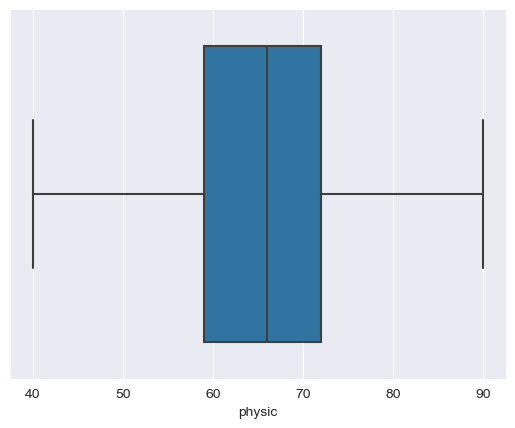

In [180]:
# boxplot
sns.boxplot(x="physic",data=data)
plt.show()

### CHECKING DISTRIBUTION AFTER IMPUTE OUTLIER

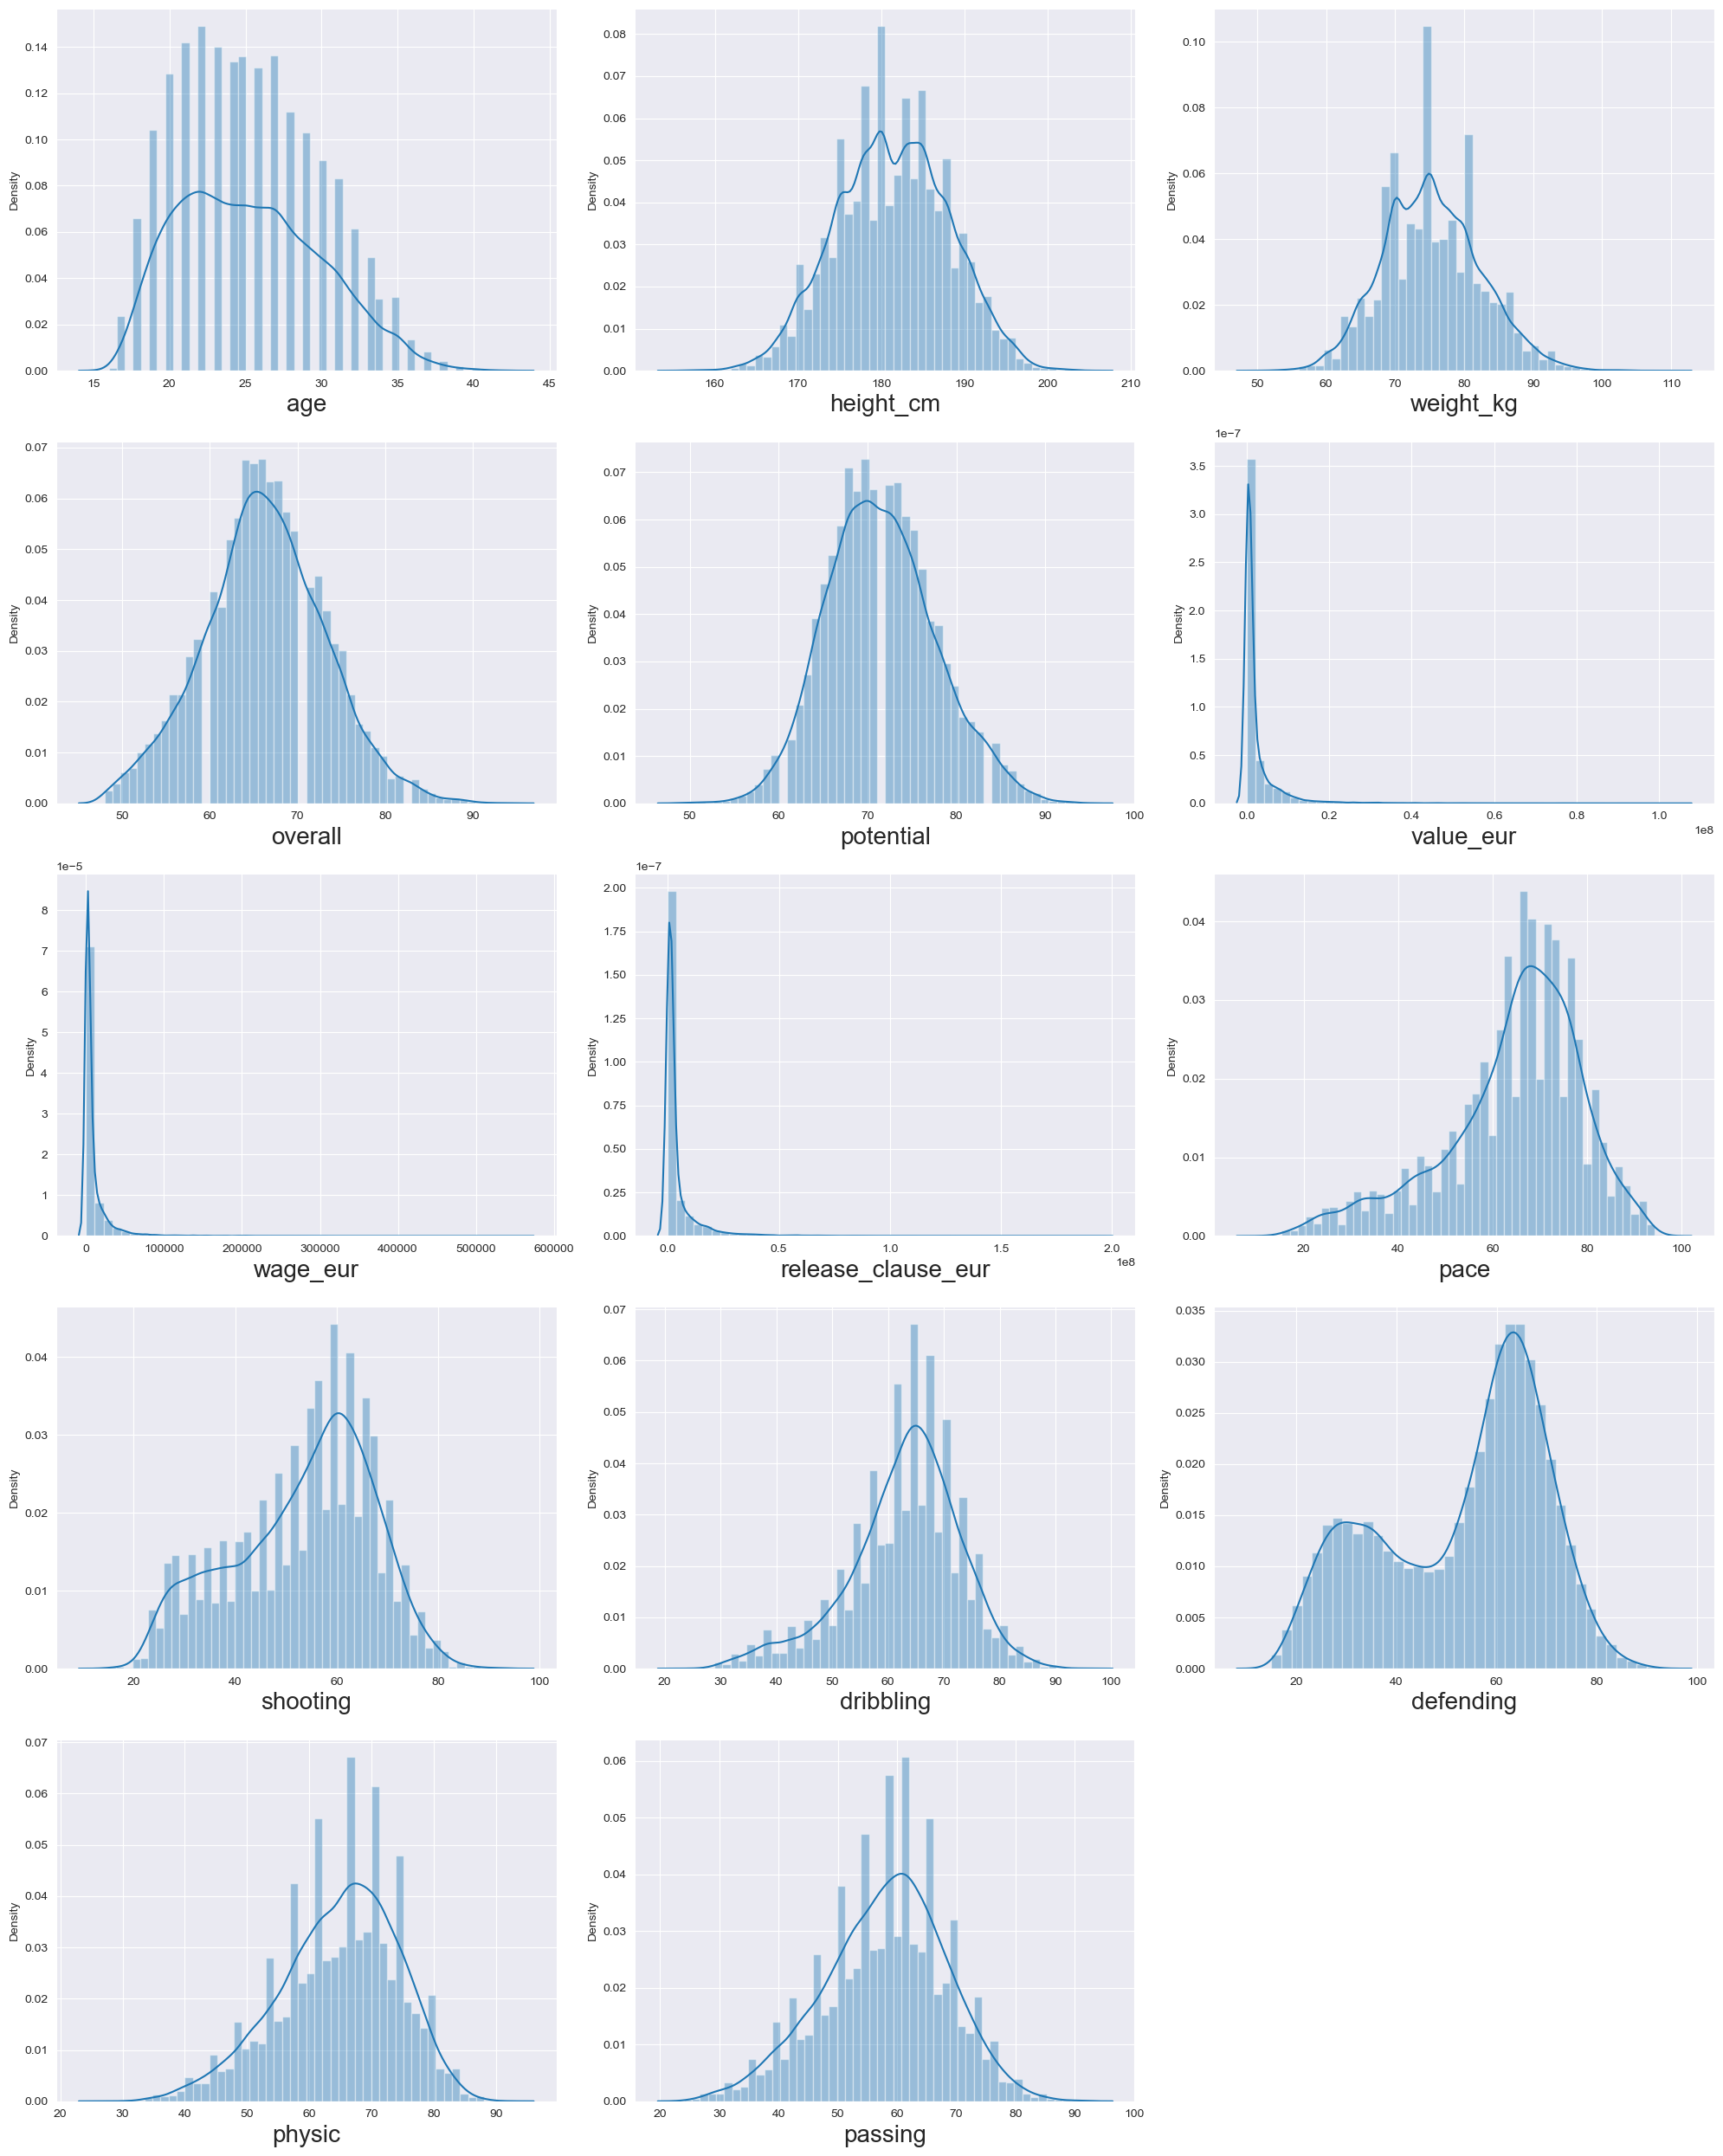

In [181]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in outlier: # iteration of columns / acessing the columns from  dataset 
    if plotno<=15:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=outlier[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

## FEATURE SELECTION

### 1.DROP UNIQUE AND CONSTANT FEATURE

* Here we are going to drop unique column as well as lots of missing value column.
* The column ls,st,rs,lw,cf etc.. are playing position in the game and the data in this columns is basically the potential of the player if were to play in that position, so we assume the player only playes with the team position and we will drop this column

In [83]:
data.drop(['player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','loaned_from','joined','nation_position',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

##### DROP HIGHLY CORRELATED FEATURE

In [84]:
# To get highly corelated feature 
pd.set_option("display.max_rows",None)
cormap=data.corr()
cormap=cormap.abs().unstack()
corrmat = cormap.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']

In [85]:
corrmat

feature1                   feature2      corr
0          release_clause_eur                  value_eur  0.979233
1                   value_eur         release_clause_eur  0.979233
2   defending_standing_tackle   defending_sliding_tackle  0.975808
3    defending_sliding_tackle  defending_standing_tackle  0.975808
4          goalkeeping_diving       goalkeeping_reflexes  0.973922
5        goalkeeping_reflexes         goalkeeping_diving  0.973922
6          goalkeeping_diving       goalkeeping_handling  0.971330
7        goalkeeping_handling         goalkeeping_diving  0.971330
8        goalkeeping_handling       goalkeeping_reflexes  0.971244
9        goalkeeping_reflexes       goalkeeping_handling  0.971244
10    goalkeeping_positioning         goalkeeping_diving  0.971218
11         goalkeeping_diving    goalkeeping_positioning  0.971218
12    goalkeeping_positioning       goalkeeping_reflexes  0.971060
13       goalkeeping_reflexes    goalkeeping_positioning  0.971060
14    goalkeeping_positioning       goalkeeping_handling  0.970517
15       goalkeeping_handling    goalkeeping_positioning  0.970517
16        goalkeeping_kicking       goalkeeping_reflexes  0.967866
17       goalkeeping_reflexes        goalkeeping_kicking  0.967866
18         goalkeeping_diving        goalkeeping_kicking  0.967057
19        goalkeeping_kicking         goalkeeping_diving  0.967057
20       goalkeeping_handling        goalkeeping_kicking  0.966508
21        goalkeeping_kicking       goalkeeping_handling  0.966508
22    goalkeeping_positioning        goalkeeping_kicking  0.966061
23        goalkeeping_kicking    goalkeeping_positioning  0.966061
24  defending_standing_tackle    mentality_interceptions  0.945287
25    mentality_interceptions  defending_standing_tackle  0.945287
26            skill_dribbling         skill_ball_control  0.943461
27         skill_ball_control            skill_dribbling  0.943461
28   defending_sliding_tackle    mentality_interceptions  0.933894
29    mentality_interceptions   defending_sliding_tackle  0.933894
30      movement_acceleration      movement_sprint_speed  0.923721
31      movement_sprint_speed      movement_acceleration  0.923721
32          defending_marking  defending_standing_tackle  0.918593
33  defending_standing_tackle          defending_marking  0.918593
34         skill_ball_control    attacking_short_passing  0.917721
35    attacking_short_passing         skill_ball_control  0.917721
36          defending_marking   defending_sliding_tackle  0.909153
37   defending_sliding_tackle          defending_marking  0.909153
38          defending_marking    mentality_interceptions  0.907401
39    mentality_interceptions          defending_marking  0.907401
40            skill_dribbling      mentality_positioning  0.904501
41      mentality_positioning            skill_dribbling  0.904501

In [86]:
data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

In [87]:
data.head(5)

age  height_cm  weight_kg    overall  potential  value_eur  wage_eur  \
0  32.0      170.0       72.0  66.244994  71.565505   95500000    565000   
1  34.0      187.0       83.0  66.244994  71.565505   58500000    405000   
2  27.0      175.0       68.0  66.244994  71.565505  105500000    290000   
3  26.0      188.0       87.0  66.244994  71.565505   77500000    125000   
4  28.0      175.0       74.0  66.244994  71.565505   90000000    470000   

   preferred_foot  international_reputation  weak_foot  ...  power_jumping  \
0               0                         5          4  ...             68   
1               1                         5          4  ...             95   
2               1                         5          5  ...             61   
3               1                         3          3  ...             78   
4               1                         4          4  ...             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   
3             41              78                12                    34   
4             84              63                80                    54   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   
2                90                   90                   94   
3                65                   11                   68   
4                89                   88                   91   

   defending_sliding_tackle  goalkeeping_kicking  
0                        26                   15  
1                        24                   15  
2                        29                   15  
3                        18                   78  
4                        22                    6  

[5 rows x 42 columns]

### 5.FEATURE SCALING

#### MIN-MAX SCALING
* Scale the feature between 0 t0 1
* Only scale the continous feature
* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)

In [89]:
df=pd.DataFrame(X_scaled,columns=['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'team_position', 'nation_jersey_number', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_acceleration', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_sliding_tackle',
       'goalkeeping_kicking'])

### 4.PRINCIPLE COMPONENT ANALYSIS(PCA)

In [90]:
from sklearn.decomposition import PCA
pca= PCA()
principle_component= pca.fit_transform(df)

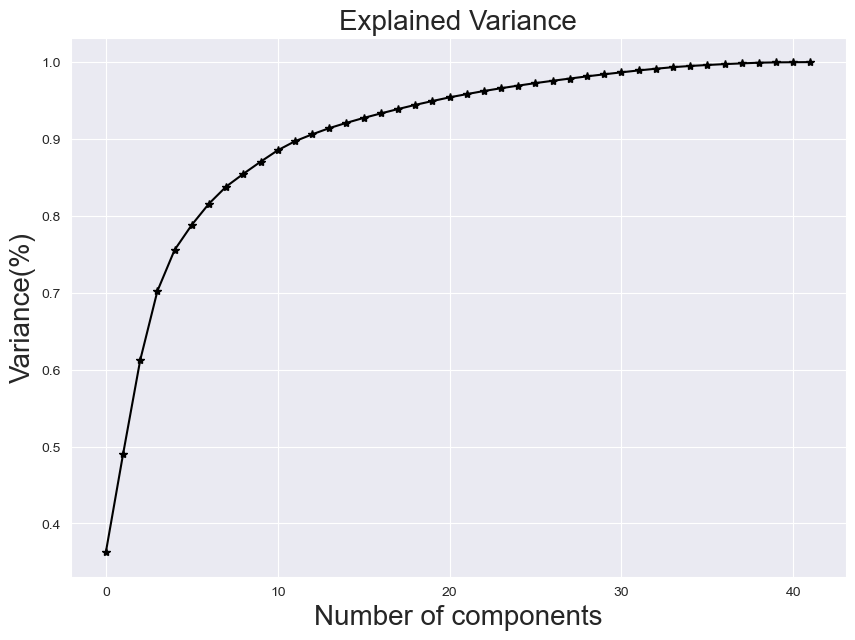

In [91]:
# Step:1 Getting optimal value of pca
from sklearn.decomposition import PCA
pca = PCA() # Object creation
principlecomponents = pca.fit_transform(df) # Fitting the data
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') #plot the variance ratio
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [92]:
# Calculate the percentage of variance explained by each feature
feature_importance = 100 * pca.explained_variance_ratio_ / np.sum(pca.explained_variance_ratio_)
feature_importance_df = pd.DataFrame({'Feature': df.columns,
                                      'Importance': feature_importance})
feature_importance_df

Feature  Importance
0                          age   36.281171
1                    height_cm   12.732067
2                    weight_kg   12.255802
3                      overall    8.972538
4                    potential    5.336497
5                    value_eur    3.257960
6                     wage_eur    2.757280
7               preferred_foot    2.218699
8     international_reputation    1.658834
9                    weak_foot    1.568434
10                 skill_moves    1.491295
11               team_position    1.173983
12        nation_jersey_number    0.896705
13                        pace    0.810592
14                    shooting    0.688467
15                     passing    0.638921
16                   dribbling    0.584738
17                   defending    0.569238
18                      physic    0.540229
19          attacking_crossing    0.501546
20         attacking_finishing    0.480794
21  attacking_heading_accuracy    0.420011
22           attacking_volleys    0.403265
23             skill_dribbling    0.364211
24                 skill_curve    0.340497
25           skill_fk_accuracy    0.324417
26          skill_long_passing    0.302352
27       movement_acceleration    0.289404
28            movement_agility    0.285274
29          movement_reactions    0.265884
30            movement_balance    0.257816
31            power_shot_power    0.247544
32               power_jumping    0.219420
33               power_stamina    0.202825
34              power_strength    0.155792
35            power_long_shots    0.127902
36        mentality_aggression    0.116157
37            mentality_vision    0.093120
38         mentality_penalties    0.088219
39         mentality_composure    0.045320
40    defending_sliding_tackle    0.018859
41         goalkeeping_kicking    0.015922

In [93]:
# Step:2 Select the components
pca = PCA(n_components=10)
fifa = pca.fit_transform(df)

# Step:3 Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -1.965592 -0.238995  0.406381  0.678838  0.197351  0.152145 -0.206399   
1 -1.798500  0.088910 -0.673788  0.641417  0.447465 -0.033013 -0.367493   
2 -1.790354 -0.540100 -0.472396  0.261494  0.014644  0.015550 -0.011104   
3  1.212065  0.227412 -0.351056  0.886400 -0.376932 -0.220588 -0.260956   
4 -1.710663 -0.383204 -0.503868  0.439565 -0.043721  0.037438 -0.155500   

       pca8      pca9     pca10  
0  0.225611 -0.027424 -0.281719  
1  0.117574 -0.000114 -0.088733  
2  0.119111 -0.207222 -0.259910  
3 -0.110956 -0.099909 -0.189390  
4  0.287140 -0.078847 -0.018226

### MODEL CREATION

* Create a cluster on data
* Get best sillhoutte score, range of sillhoutte score between -1 to +1

In [94]:
#Step:1 Define independant veriable
X = principle_df
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -1.965592 -0.238995  0.406381  0.678838  0.197351  0.152145 -0.206399   
1 -1.798500  0.088910 -0.673788  0.641417  0.447465 -0.033013 -0.367493   
2 -1.790354 -0.540100 -0.472396  0.261494  0.014644  0.015550 -0.011104   
3  1.212065  0.227412 -0.351056  0.886400 -0.376932 -0.220588 -0.260956   
4 -1.710663 -0.383204 -0.503868  0.439565 -0.043721  0.037438 -0.155500   

       pca8      pca9     pca10  
0  0.225611 -0.027424 -0.281719  
1  0.117574 -0.000114 -0.088733  
2  0.119111 -0.207222 -0.259910  
3 -0.110956 -0.099909 -0.189390  
4  0.287140 -0.078847 -0.018226

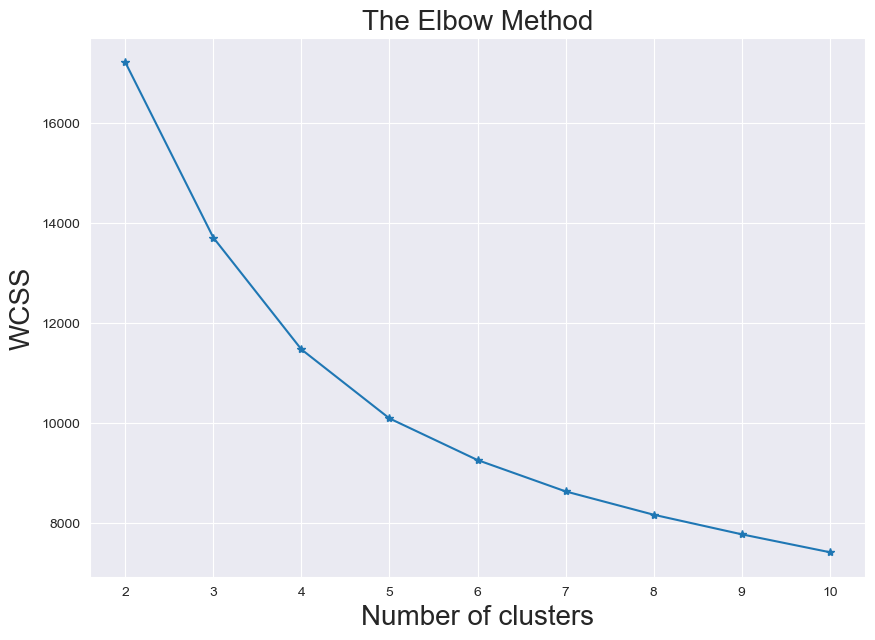

In [95]:
# Step:3 Initalize the k value
from sklearn.cluster import KMeans
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

In [96]:
# Step:3 initalize the cluster
kmeans = KMeans(n_clusters=2,random_state=45)

# Step:4 Fitting the data
kmeans.fit(X)

# Step:5  Get labels
kmeans.labels_

# Step:6 Print dataset with labels
principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -1.965592 -0.238995  0.406381  0.678838  0.197351  0.152145 -0.206399   
1 -1.798500  0.088910 -0.673788  0.641417  0.447465 -0.033013 -0.367493   
2 -1.790354 -0.540100 -0.472396  0.261494  0.014644  0.015550 -0.011104   
3  1.212065  0.227412 -0.351056  0.886400 -0.376932 -0.220588 -0.260956   
4 -1.710663 -0.383204 -0.503868  0.439565 -0.043721  0.037438 -0.155500   

       pca8      pca9     pca10  cluster  
0  0.225611 -0.027424 -0.281719        0  
1  0.117574 -0.000114 -0.088733        0  
2  0.119111 -0.207222 -0.259910        0  
3 -0.110956 -0.099909 -0.189390        1  
4  0.287140 -0.078847 -0.018226        0

In [97]:
# Step:7 initalize the centroids
kmeans.cluster_centers_

array([[-3.91110261e-01, -4.77934330e-02, -2.66785516e-03,
         8.06133681e-03,  1.77174957e-04,  6.05976146e-03,
         8.90849646e-04, -3.69703376e-03,  3.88633455e-03,
         8.76012438e-03],
       [ 8.99970352e-01,  1.09975823e-01,  6.13890963e-03,
        -1.85496645e-02, -4.07691191e-04, -1.39439084e-02,
        -2.04990344e-03,  8.50711706e-03, -8.94271058e-03,
        -2.01576205e-02]])

## MODEL EVALUATION

### SILHOUETTE SCORE

* silhouette score range(-1 to +1)
* +1 ---> Samles are very far from cluster
*  0 ---> Samples close to dicision boundry
* -1 ---> Samples are assign to wrong cluster

In [98]:
# Step:8 Create a new veriable assign to labels
labels = kmeans.labels_
labels

# Step:9 import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.3737360684281536


## Task3:- Explore the data and attempt all the below asked questions in a step by step manner:

### NOTE - when you want to run the code below, you start with importing library to IQR method,it will run beacause i have deleted         nationality feature.

### 1)  Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

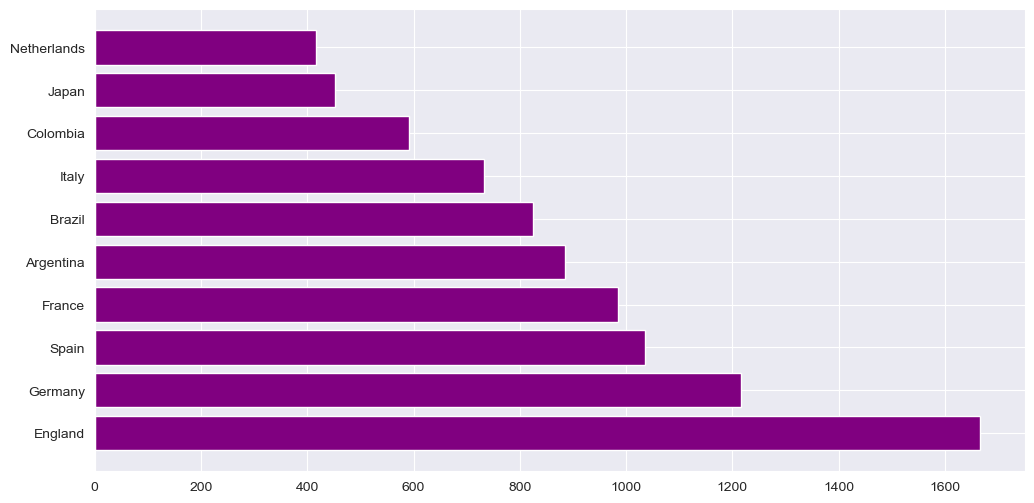

In [182]:
plt.figure(figsize = (12,6))
plt.barh(data["nationality"].value_counts()[:10].keys(),data["nationality"].value_counts()[:10],color = 'purple');

### Our Insights:

1) Here we can clearly see in the graph that 'England' and 'Germany' are producing the most footballers

### 2) Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

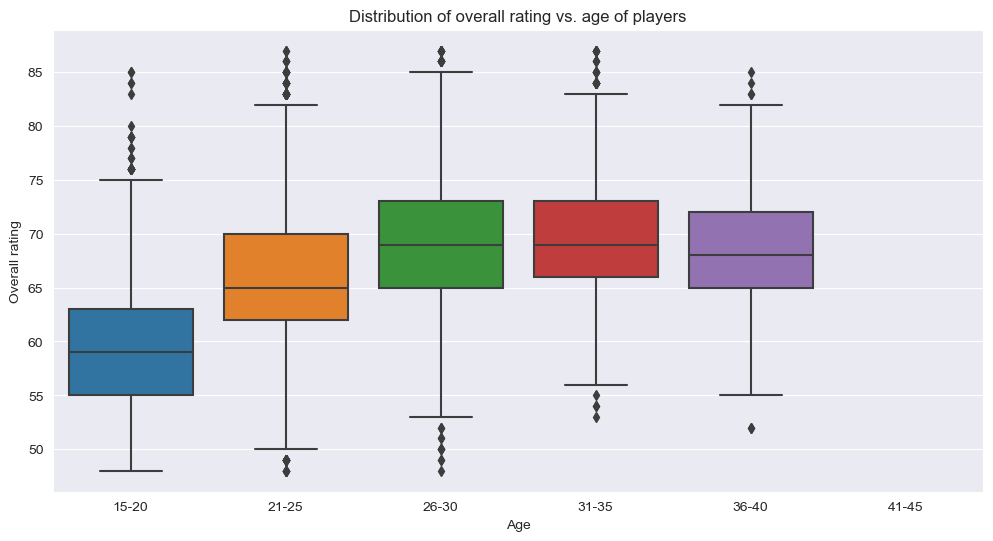

In [183]:
fifa_df = data.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
plt.figure(figsize = (12,6))
sns.boxplot(x=fifa_df["Age Group"], y=fifa_df["overall"])
plt.xlabel("Age")
plt.ylabel("Overall rating")
plt.title("Distribution of overall rating vs. age of players")
plt.show()

###  Our Insights:

1) From the above graph we can conclude that after the age of 30-35 years of age the overall rating of the player tends to go down

### 3) Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

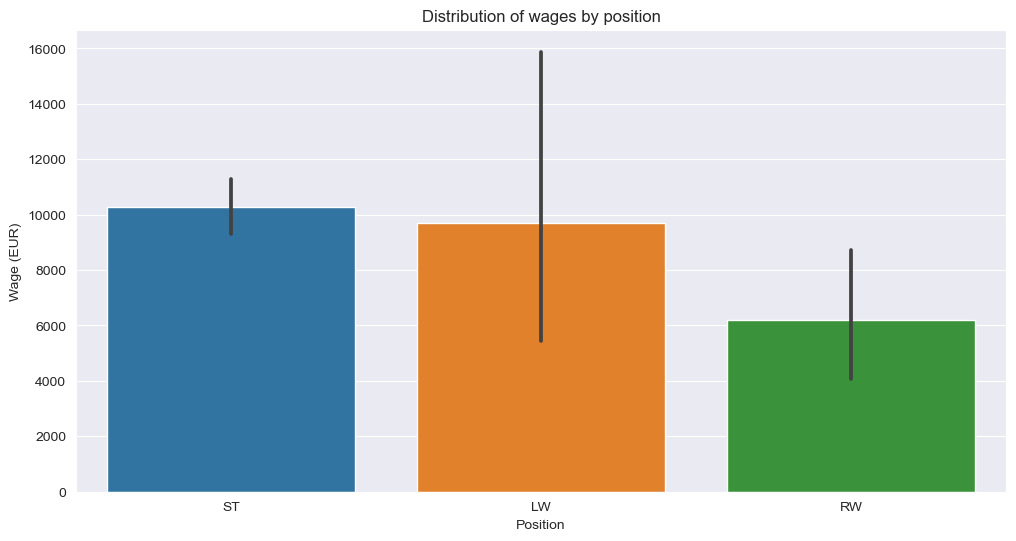

In [184]:
plt.figure(figsize = (12,6))

# Create a new column to store the position
forwards_df = fifa_df[(fifa_df["player_positions"] == 'LW') | (fifa_df["player_positions"] == 'RW')| (fifa_df["player_positions"] == 'ST')]

sns.barplot(x="player_positions", y="wage_eur", data=forwards_df)
plt.xlabel("Position")
plt.ylabel("Wage (EUR)")
plt.title("Distribution of wages by position")
plt.show()

### Our Insights:

1) From the barplot we can see that on an average the striker players are getting paid the most

## Model Comparison Report

* For our fifa20 dataset we have attempted to cluster similar types of players using KMeans clustering.

* So we are suggesting KMeans Clustering with number of cluster = 2, is best for clustering this dataset.

## Report on Challenges faced

The challenges we faced during this project are as follows:

* The fifa20 dataset is a huge dataset with 104 columns as such we needed to handle the features a bit differently; we splitted   our dataset into numerical and categorical features and then we handled each feature.

* The dataset contained lots of extreme outliers in some features of the dataset which was giving us incorrect results; we had     to handle these outliers by making a separate function and run the function on those features.

* Team position feature has many missing value a value 54.0 assigned where GK name then we got 2035 Duplicated
* Such type of problem requires a domain expert specifically

## CONCLUSION:

* The fifa20 dataset is a challenging dataset where one has to do unsupervised machine learning; meaning there were no target or   label in the dataset. Two main takeaways of this project is: clustering the players based on their features and finding the     most important features to group these players on. As it is an unsupervised machine learning one has to do a lot of             assumptions. In our case we also had to make a lot of assumptions but all of our assumptions were backed by facts and numbers.   As we have seen that in order to cluster the players using KMeans; we selected number of cluster equal to 2, and this cluster   number was selected by best score of elbow method, silhouettee score.

* We removed some features in the data that were highly correlated and then calculated their quality percentages.we performed     Min-Max Scaling then apply PCA got 10 best components and do the clustring

* Using the clusters we have divided our dataset into 2 cluster and we assumed that players in cluster 1 were more likely to       have greater potential to get picked to build an ideal team. We also found that the players' value in euro is highly             correlated with these clusters; so we grouped players that have greater value in euro and overall rating and based on their     positions we tried to form a team which can be formed with the minimum budget



* 2 Cluster silhouette score is 0.4365
* 3 Cluster silhouette score is 0.3829
* 4 cluster Silhouette Score is 0.4342
* From the above score of we are select the 2 cluster

##### Our overall suggestion for clustering this dataset is using KMeans Clustering with number of cluster = 2